# install packages

In [1]:
from pandas_datareader import data
import pandas as pd
import numpy as np
from finta import TA as tan
import ta
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import sklearn.metrics as met
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
import pickle
import sklearn
import math
from sklearn import svm

C:\Users\kunil\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\kunil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kunil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kunil\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is de

# Import data

In [586]:
tickers = ['MOEX.ME', '^HSI', '^NDX']

start_date = '2013-02-15'
end_date = '2020-04-01'

panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [587]:
panel_data.head()

Attributes  Adj Close                                 Close                \
Symbols       MOEX.ME          ^HSI         ^NDX    MOEX.ME          ^HSI   
Date                                                                        
2013-02-15  36.525818  23444.560547  2764.669922  55.000000  23444.560547   
2013-02-18  37.203205  23381.939453          NaN  56.020000  23381.939453   
2013-02-19  37.189926  23143.910156  2782.860107  56.000000  23143.910156   
2013-02-20  36.791462  23307.410156  2739.989990  55.400002  23307.410156   
2013-02-21  36.326588  22906.669922  2711.510010  54.700001  22906.669922   

Attributes                    High                                   Low  \
Symbols            ^NDX    MOEX.ME          ^HSI         ^NDX    MOEX.ME   
Date                                                                       
2013-02-15  2764.669922  58.150002  23446.769531  2779.070068  51.230000   
2013-02-18          NaN  56.599998  23477.490234          NaN  54.180000   
2013-02-19  2782.860107  56.599998  23454.189453  2782.860107  55.950001   
2013-02-20  2739.989990  56.500000  23310.929688  2782.449951  54.980000   
2013-02-21  2711.510010  55.389999  23026.179688  2731.250000  54.410000   

Attributes                                  Open                             \
Symbols             ^HSI         ^NDX    MOEX.ME          ^HSI         ^NDX   
Date                                                                          
2013-02-15  23284.050781  2756.429932  58.150002  23315.410156  2772.560059   
2013-02-18  23309.550781          NaN  55.000000  23477.490234          NaN   
2013-02-19  23139.080078  2766.860107  56.540001  23368.220703  2770.699951   
2013-02-20  23163.859375  2739.270020  56.299999  23310.929688  2781.000000   
2013-02-21  22828.169922  2700.320068  54.990002  23026.179688  2730.100098   

Attributes     Volume                              
Symbols       MOEX.ME          ^HSI          ^NDX  
Date                                               
2013-02-15  6082550.0  1.055545e+09  1.858670e+09  
2013-02-18  2767350.0  1.033228e+09           NaN  
2013-02-19  1761630.0  1.434541e+09  1.843840e+09  
2013-02-20  1438600.0  1.562430e+09  2.001800e+09  
2013-02-21    47963.0  2.061813e+09  2.052630e+09

In [589]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

high = panel_data['High'].reindex(all_weekdays).fillna(method='ffill')
high.rename(columns={'MOEX.ME': 'MOEX.ME', '^HSI': 'HSI', '^NDX': 'NDX'}, inplace=True)

low = panel_data['Low'].reindex(all_weekdays).fillna(method='ffill')
low.rename(columns={'MOEX.ME': 'MOEX.ME', '^HSI': 'HSI', '^NDX': 'NDX'}, inplace=True)

close = panel_data['Close'].reindex(all_weekdays).fillna(method='ffill')
close.rename(columns={'MOEX.ME': 'MOEX.ME', '^HSI': 'HSI', '^NDX': 'NDX'}, inplace=True)

# TA indicators

In [590]:
df_moex = pd.DataFrame()
df_hsi = pd.DataFrame()
df_NDX = pd.DataFrame()
df_moex['Close'] = close['MOEX.ME']
df_hsi['Close'] = close['HSI']
df_NDX['Close'] = close['NDX']
df_moex['close'] = df_moex['Close']
df_hsi['close'] = df_hsi['Close']
df_NDX['close'] = df_NDX['Close']
df_moex['high'] = high['MOEX.ME']
df_moex['low'] = low['MOEX.ME']

## SMA, EMA

### MOEX

In [591]:
df_moex['SMA'] = tan.SMA(df_moex, 25)
df_moex['EMA'] = tan.EMA(df_moex, 50)

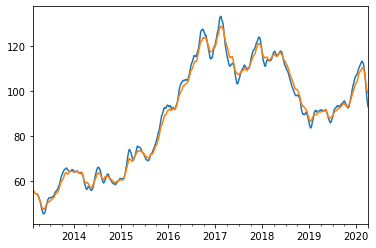

In [592]:
df_moex['SMA'].plot()
df_moex['EMA'].plot()

### HSI

In [593]:
df_hsi['SMA'] = tan.SMA(df_hsi, 25)
df_hsi['EMA'] = tan.EMA(df_hsi, 50)

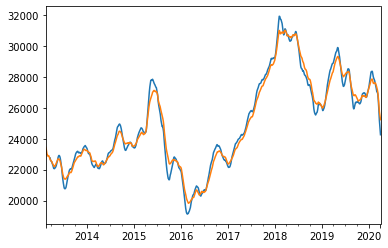

In [594]:
df_hsi['SMA'].plot()
df_hsi['EMA'].plot()

### NDX

In [595]:
df_NDX['SMA'] = tan.SMA(df_NDX, 25)
df_NDX['EMA'] = tan.EMA(df_NDX, 50)

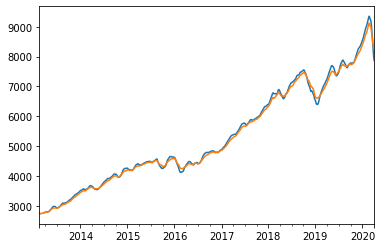

In [596]:
df_NDX['SMA'].plot()
df_NDX['EMA'].plot()

## Bollinger Bands

### MOEX

In [597]:
indicator_bb = ta.volatility.BollingerBands(close=df_moex['Close'], n=20, ndev=2)

In [598]:
df_moex['bb_bbm'] = indicator_bb.bollinger_mavg()
df_moex['bb_bbh'] = indicator_bb.bollinger_hband()
df_moex['bb_bbl'] = indicator_bb.bollinger_lband()

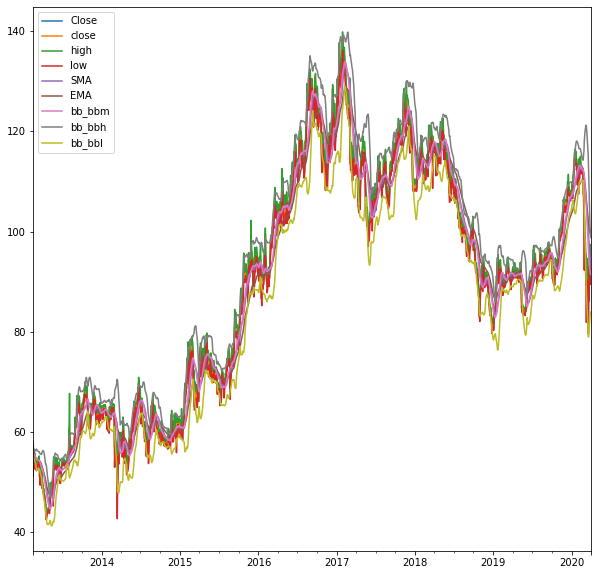

In [599]:
df_moex.plot(figsize=(10,10))

### HSI

In [600]:
indicator_bb = ta.volatility.BollingerBands(close=df_hsi['Close'], n=20, ndev=2)

In [601]:

df_hsi['bb_bbm'] = indicator_bb.bollinger_mavg()
df_hsi['bb_bbh'] = indicator_bb.bollinger_hband()
df_hsi['bb_bbl'] = indicator_bb.bollinger_lband()

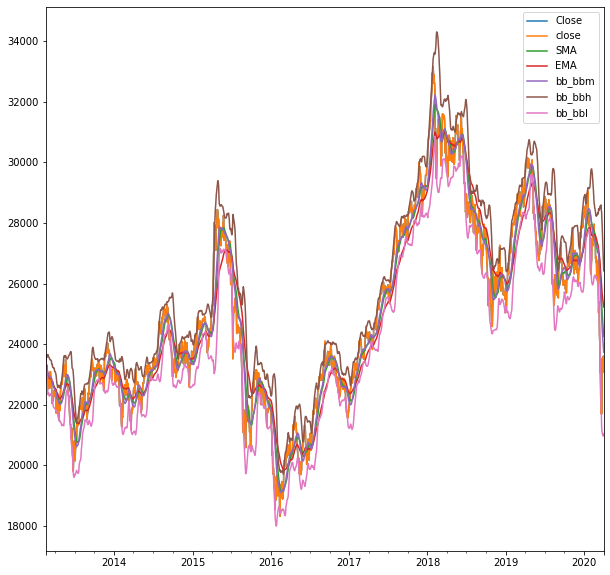

In [602]:
df_hsi.plot(figsize=(10,10))

### NDX

In [603]:
indicator_bb = ta.volatility.BollingerBands(close=df_NDX['Close'], n=20, ndev=2)

In [604]:
df_NDX['bb_bbm'] = indicator_bb.bollinger_mavg()
df_NDX['bb_bbh'] = indicator_bb.bollinger_hband()
df_NDX['bb_bbl'] = indicator_bb.bollinger_lband()

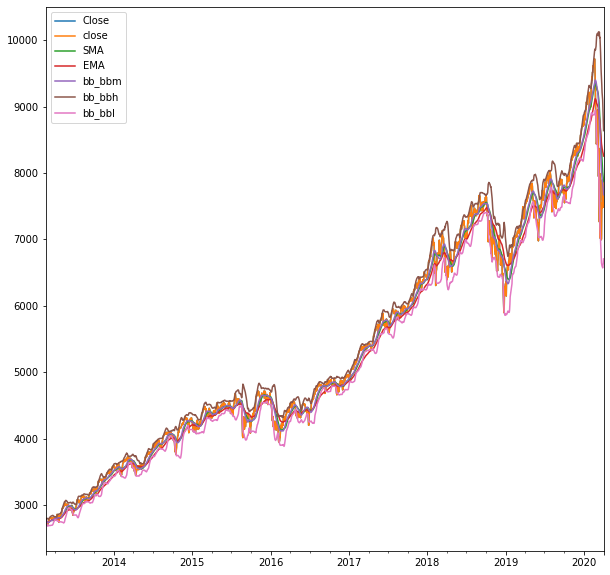

In [605]:
df_NDX.plot(figsize=(10,10))

## Momentum

### MOEX

In [606]:
momentum = tan.MOM(df_moex,10)
df_moex['mom'] = momentum

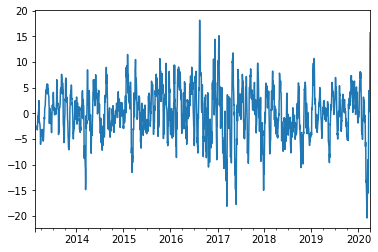

In [607]:
df_moex['mom'].plot()

### HSI

In [608]:
momentum = tan.MOM(df_hsi,10)
df_hsi['mom'] = momentum

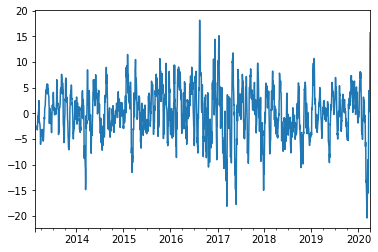

In [609]:
df_moex['mom'].plot()

### NDX

In [610]:
momentum = tan.MOM(df_NDX,10)
df_NDX['mom'] = momentum

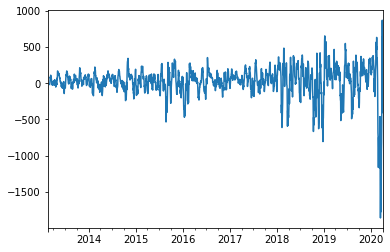

In [611]:
df_NDX['mom'].plot()

## MACD

### MOEX

In [612]:
MACD = tan.MACD(df_moex)
df_moex['MACD'] = MACD['MACD']
df_moex['MACD_sig'] = MACD['SIGNAL']

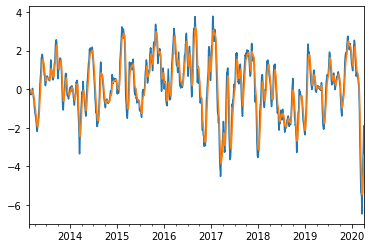

In [613]:
df_moex['MACD'].plot()
df_moex['MACD_sig'].plot()

### HSI

In [614]:
MACD = tan.MACD(df_hsi)
df_hsi['MACD'] = MACD['MACD']
df_hsi['MACD_sig'] = MACD['SIGNAL']

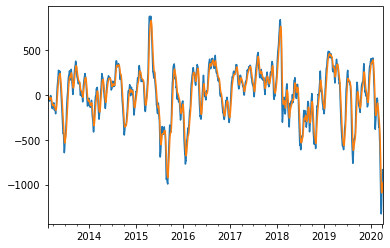

In [615]:
df_hsi['MACD'].plot()
df_hsi['MACD_sig'].plot()

### NDX

In [616]:
MACD = tan.MACD(df_NDX)
df_NDX['MACD'] = MACD['MACD']
df_NDX['MACD_sig'] = MACD['SIGNAL']

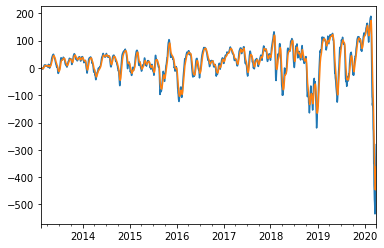

In [617]:
df_NDX['MACD'].plot()
df_NDX['MACD_sig'].plot()

## RSI

### MOEX

In [618]:
df_moex['RSI'] = tan.RSI(df_moex)

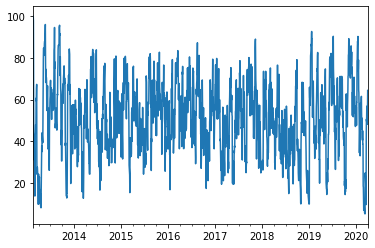

In [619]:
df_moex['RSI'].plot()

### HSI

In [620]:
df_hsi['RSI'] = tan.RSI(df_hsi)

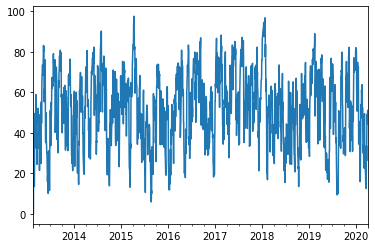

In [621]:
df_hsi['RSI'].plot()

### NDX

In [622]:
df_NDX['RSI'] = tan.RSI(df_NDX)

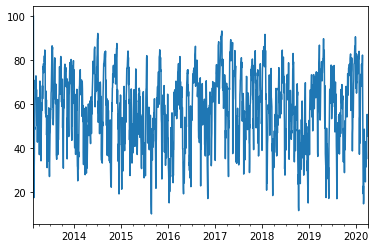

In [623]:
df_NDX['RSI'].plot()

## STOCH %K

### MOEX

In [624]:
df_moex['%K'] = tan.STOCH(df_moex)

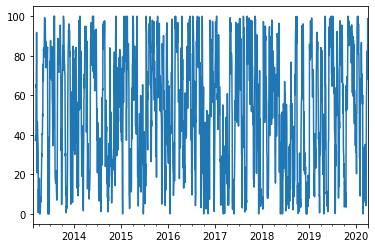

In [625]:
df_moex['%K'].plot()

### HSI

In [626]:
df_hsi['high'] = high['HSI']
df_hsi['low'] = low['HSI']
df_hsi['%K'] = tan.STOCH(df_hsi)

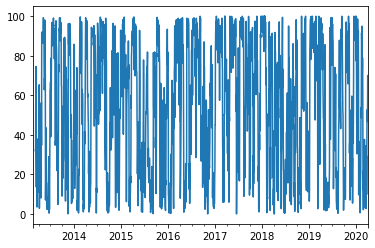

In [627]:
df_hsi['%K'].plot()

### NDX

In [628]:
df_NDX['high'] = high['NDX']
df_NDX['low'] = low['NDX']
df_NDX['%K'] = tan.STOCH(df_moex)

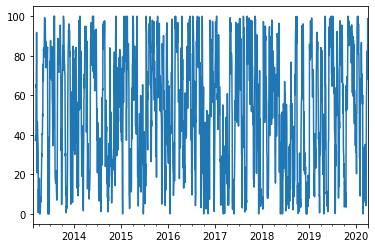

In [629]:
df_NDX['%K'].plot()

## WR

### MOEX

In [630]:
df_moex['WR'] = tan.WILLIAMS(df_moex)

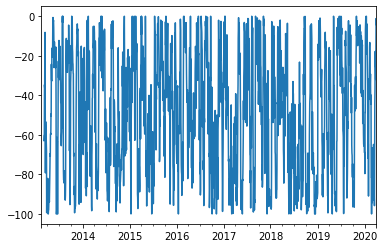

In [631]:
df_moex['WR'].plot()

### HSI

In [632]:
df_hsi['WR'] = tan.WILLIAMS(df_hsi)

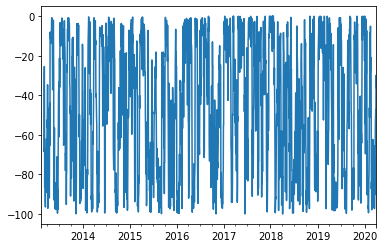

In [633]:
df_hsi['WR'].plot()

### NDX

In [634]:
df_NDX['WR'] = tan.WILLIAMS(df_NDX)

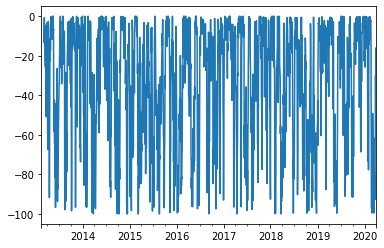

In [635]:
df_NDX['WR'].plot()

## STOCH %D

### MOEX

In [636]:
df_moex['%D'] = tan.STOCHD(df_moex)

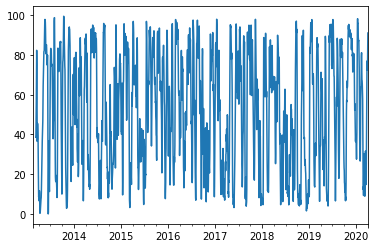

In [637]:
df_moex['%D'].plot()

### HSI

In [638]:
df_hsi['%D'] = tan.STOCHD(df_hsi)

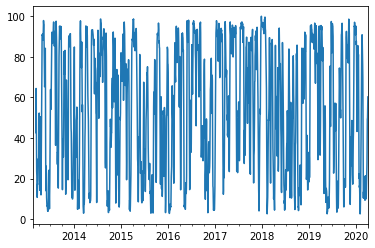

In [639]:
df_hsi['%D'].plot()

### NDX

In [640]:
df_NDX['%D'] = tan.STOCHD(df_NDX)

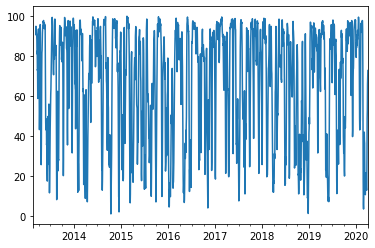

In [641]:
df_NDX['%D'].plot()

## EBBP

### MOEX

In [642]:
EBBP = tan.EBBP(df_moex)

In [643]:
df_moex['EnBull'] = EBBP['Bull.']
df_moex['BearPow'] = EBBP['Bear.']

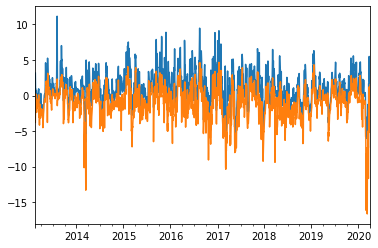

In [644]:
df_moex['EnBull'].plot()
df_moex['BearPow'].plot()

### HSI

In [645]:
EBBP = tan.EBBP(df_hsi)
df_hsi['EnBull'] = EBBP['Bull.']
df_hsi['BearPow'] = EBBP['Bear.']

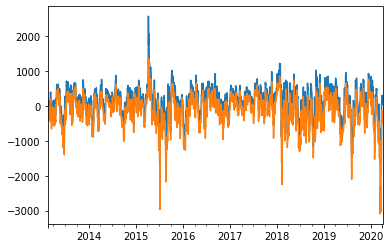

In [646]:
df_hsi['EnBull'].plot()
df_hsi['BearPow'].plot()

### NDX

In [647]:
EBBP = tan.EBBP(df_NDX)
df_NDX['EnBull'] = EBBP['Bull.']
df_NDX['BearPow'] = EBBP['Bear.']

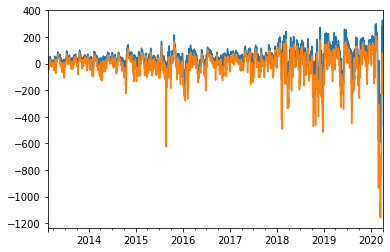

In [648]:
df_NDX['EnBull'].plot()
df_NDX['BearPow'].plot()

## CCI

### MOEX

In [649]:
df_moex['CCI'] = tan.CCI(df_moex)

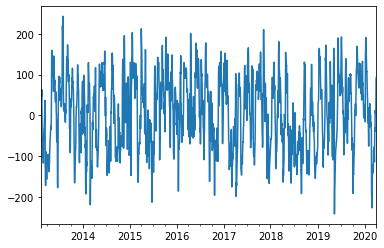

In [650]:
df_moex['CCI'].plot()

### HSI

In [651]:
df_hsi['CCI'] = tan.CCI(df_hsi)

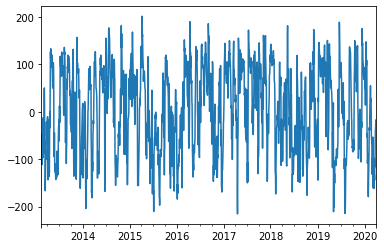

In [652]:
df_hsi['CCI'].plot()

### NDX

In [653]:
df_NDX['CCI'] = tan.CCI(df_NDX)

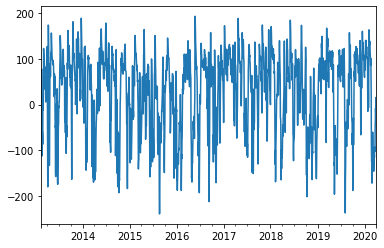

In [654]:
df_NDX['CCI'].plot()

# Drop

In [655]:
df_moex = df_moex.drop(['close'], axis=1)
df_hsi= df_hsi.drop(['close'], axis=1)
df_NDX = df_NDX.drop(['close'], axis=1)

In [656]:
print(df_moex.isna().sum())
print(df_hsi.isna().sum())
print(df_NDX.isna().sum())

Close        0
high         0
low          0
SMA         24
EMA          0
bb_bbm       0
bb_bbh       0
bb_bbl       0
mom         10
MACD         0
MACD_sig     0
RSI          1
%K          13
WR          13
%D          15
EnBull       0
BearPow      0
CCI          1
dtype: int64
Close        0
SMA         24
EMA          0
bb_bbm       0
bb_bbh       0
bb_bbl       0
mom         10
MACD         0
MACD_sig     0
RSI          1
high         0
low          0
%K          13
WR          13
%D          15
EnBull       0
BearPow      0
CCI          1
dtype: int64
Close        0
SMA         24
EMA          0
bb_bbm       0
bb_bbh       0
bb_bbl       0
mom         10
MACD         0
MACD_sig     0
RSI          2
high         0
low          0
%K          13
WR          13
%D          15
EnBull       0
BearPow      0
CCI          2
dtype: int64


In [657]:
print(len(df_moex))
print(len(df_hsi))
print(len(df_NDX))

1859
1859
1859


In [658]:
df_moex.dropna(inplace=True)
df_hsi.dropna(inplace=True)
df_NDX.dropna(inplace=True)

In [659]:
print(len(df_moex))
print(len(df_hsi))
print(len(df_NDX))

1835
1835
1835


In [660]:
df_moex.corr()

,Close,high,low,SMA,EMA,bb_bbm,bb_bbh,bb_bbl,mom,MACD,MACD_sig,RSI,%K,WR,%D,EnBull,BearPow,CCI
Close,1.000000,0.998977,0.998849,0.984926,0.980029,0.987729,0.982299,0.984457,0.068729,0.113428,0.114830,0.072203,0.064631,0.064631,0.068731,0.136328,-0.017648,0.071608
high,0.998977,1.000000,0.998485,0.986303,0.981270,0.989056,0.984449,0.984887,0.056349,0.109565,0.113833,0.056279,0.048436,0.048436,0.061854,0.136606,-0.031222,0.061599
low,0.998849,0.998485,1.000000,0.985468,0.980607,0.988349,0.982022,0.986034,0.059150,0.112881,0.116225,0.058096,0.048185,0.048185,0.061650,0.125920,-0.011333,0.063251
SMA,0.984926,0.986303,0.985468,1.000000,0.996567,0.999363,0.995824,0.993954,-0.083069,-0.028711,0.009371,-0.078841,-0.072694,-0.072694,-0.070558,-0.016360,-0.169173,-0.078872
EMA,0.980029,0.981270,0.980607,0.996567,1.000000,0.994746,0.992197,0.988318,-0.080281,-0.071763,-0.049064,-0.082167,-0.070210,-0.070210,-0.069271,-0.020707,-0.170902,-0.080457
bb_bbm,0.987729,0.989056,0.988349,0.999363,0.994746,1.000000,0.995859,0.995231,-0.075154,0.000154,0.039815,-0.068552,-0.066631,-0.066631,-0.061866,-0.005483,-0.157880,-0.068304
bb_bbh,0.982299,0.984449,0.982022,0.995824,0.992197,0.995859,1.000000,0.982243,-0.081192,-0.017367,0.021050,-0.072238,-0.066364,-0.066364,-0.062031,-0.004535,-0.173288,-0.068596
bb_bbl,0.984457,0.984887,0.986034,0.993954,0.988318,0.995231,0.982243,1.000000,-0.067984,0.018952,0.059583,-0.063967,-0.066303,-0.066303,-0.061120,-0.006450,-0.139892,-0.067361
mom,0.068729,0.056349,0.059150,-0.083069,-0.080281,-0.075154,-0.081192,-0.067984,1.000000,0.599668,0.339726,0.832577,0.804393,0.804393,0.808140,0.850837,0.835220,0.833753
MACD,0.113428,0.109565,0.112881,-0.028711,-0.071763,0.000154,-0.017367,0.018952,0.599668,1.000000,0.945359,0.591174,0.487959,0.487959,0.586134,0.627181,0.618008,0.613952


In [661]:
#df_moex.drop(['mom', 'RSI', '%K', 'WR', '%D', 'BearPow', 'CCI'], axis = 1, inplace=True)

In [662]:
df_moex.head()

,Close,high,low,SMA,EMA,bb_bbm,bb_bbh,bb_bbl,mom,MACD,MACD_sig,RSI,%K,WR,%D,EnBull,BearPow,CCI
2013-03-21,52.130001,52.959999,51.950001,54.0720,53.864209,53.7340,55.651816,51.816184,-1.860001,-0.373606,-0.192275,27.528610,46.655238,-53.344762,37.970619,-0.398430,-1.408428,-88.806249
2013-03-22,51.939999,52.299999,51.500000,53.9496,53.747506,53.6060,55.640409,51.571591,-2.050003,-0.437838,-0.241536,25.850646,43.396192,-56.603808,45.511701,-0.852046,-1.652046,-104.852219
2013-03-25,51.700001,52.380001,51.700001,53.7768,53.625932,53.4535,55.577320,51.329679,-2.299999,-0.499779,-0.293310,23.741518,39.279592,-60.720408,43.110340,-0.561328,-1.241328,-92.840830
2013-03-26,51.490002,51.799999,50.689999,53.5964,53.501613,53.3080,55.548050,51.067950,-3.109997,-0.557266,-0.346204,21.934674,35.677550,-64.322450,39.451111,-0.931192,-2.041192,-113.635067
2013-03-27,51.259998,51.509998,50.549999,53.4308,53.373575,53.1610,55.529780,50.792220,-3.290001,-0.612220,-0.399489,20.010135,31.732382,-68.267618,35.563175,-1.008589,-1.968588,-110.164410


# Metrics

In [663]:
mse = met.mean_squared_error

In [664]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [665]:
def rrmse(evaluation, simulation):
    if len(evaluation) == len(simulation):
        rrmse = rmse(evaluation, simulation) / np.mean(evaluation)
        return rrmse
    else:
        logging.warning("evaluation and simulation lists does not have the same length.")
        return np.nan

In [666]:
mae = met.mean_absolute_error

In [667]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data split

In [668]:
data_frames = [df_moex, df_hsi, df_NDX]
df_merged = pd.concat(data_frames)

In [669]:
Xm = df_merged[['SMA', 'EMA', 'mom', '%K', '%D', 'MACD', 'RSI', 'EnBull', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'BearPow']]
ym = df_merged['Close']

In [781]:
X_moex = df_moex[['SMA', 'EMA', 'mom', '%K', '%D', 'MACD', 'RSI', 'EnBull', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'BearPow']]
y_moex = df_moex['Close']

In [782]:
X_train_moex, X_test_moex, y_train_moex, y_test_moex = train_test_split(X_moex, y_moex, test_size=0.2, random_state=42)

In [672]:
X_hsi = df_hsi[['SMA', 'EMA', 'mom', '%K', '%D', 'MACD', 'RSI', 'EnBull', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'BearPow']]
y_hsi = df_hsi['Close']

In [673]:
X_train_hsi, X_test_hsi, y_train_hsi, y_test_hsi = train_test_split(X_hsi, y_hsi, test_size=0.2, random_state=42)

In [674]:
X_NDX = df_NDX[['SMA', 'EMA', 'mom', '%K', '%D', 'MACD', 'RSI', 'EnBull', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'BearPow']]
y_NDX = df_NDX['Close']

In [675]:
X_train_NDX, X_test_NDX, y_train_NDX, y_test_NDX = train_test_split(X_NDX, y_NDX, test_size=0.2, random_state=42)

# ANN


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
tf.keras.layers.Dropout(0.3)
model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=500)

model = Sequential()
model.add(Dense(10, activation='elu'))
tf.keras.layers.Dropout(0.3)
model.add(Dense(5, activation='softplus'))
model.add(Dense(1, activation='softplus'))

model = Sequential()
model.add(Dense(10, activation='elu'))
tf.keras.layers.Dropout(0.3)
model.add(Dense(5, activation='softplus'))
model.add(Dense(1, activation='softplus'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=1000)#, batch_size=10)

preds = model.predict(X_test)

# Sklearn ensemble

In [676]:
clf1 = RandomForestRegressor(n_estimators=600, max_features=10)
clf2 = LinearRegression()
clf3 = MLPRegressor(learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000, hidden_layer_sizes=15, activation='identity', solver='lbfgs', alpha=0.03, batch_size=5, random_state=10)

In [677]:
clf1 = RandomForestRegressor(n_estimators=600, max_features=10)
clf2 = LinearRegression()
clf3 = MLPRegressor(learning_rate='adaptive', learning_rate_init=0.03, max_iter=5000, hidden_layer_sizes=15, 
                    activation='identity', solver='lbfgs', alpha=0.03, batch_size=5, random_state=10)

In [678]:
clf1 = svm.SVR(C=10000.0, epsilon=0.01, kernel='rbf')
clf3 = MLPRegressor(learning_rate='adaptive', learning_rate_init=0.01, max_iter=5000, hidden_layer_sizes=15, 
                    activation='identity', solver='lbfgs', alpha=0.03, batch_size=5, random_state=10)

In [780]:
clf_moex = svm.SVR(C=10000.0, epsilon=0.01, kernel='rbf')
clf_moex = MLPRegressor(learning_rate='adaptive', learning_rate_init=0.01, max_iter=5000, hidden_layer_sizes=15, 
                    activation='identity', solver='lbfgs', alpha=0.03, batch_size=5, random_state=10)
clf_moex = LinearRegression()

In [783]:
%%time
eclf_moex = VotingRegressor(estimators=[
        ('svr', clf1), ('mlp', clf2), ('lr', clf3)], n_jobs=-1)
eclf_moex.fit(X_train_moex, y_train_moex)
preds_moex = eclf_moex.predict(X_test)
print(mse(y_test_moex, preds_moex), rrmse(y_test_moex, preds_moex), mae(y_test_moex, preds_moex), mape(y_test_moex, preds_moex))

0.19210162524520705 0.004856865465009213 0.33849505638780336 0.3937711156606576
Wall time: 13.6 s


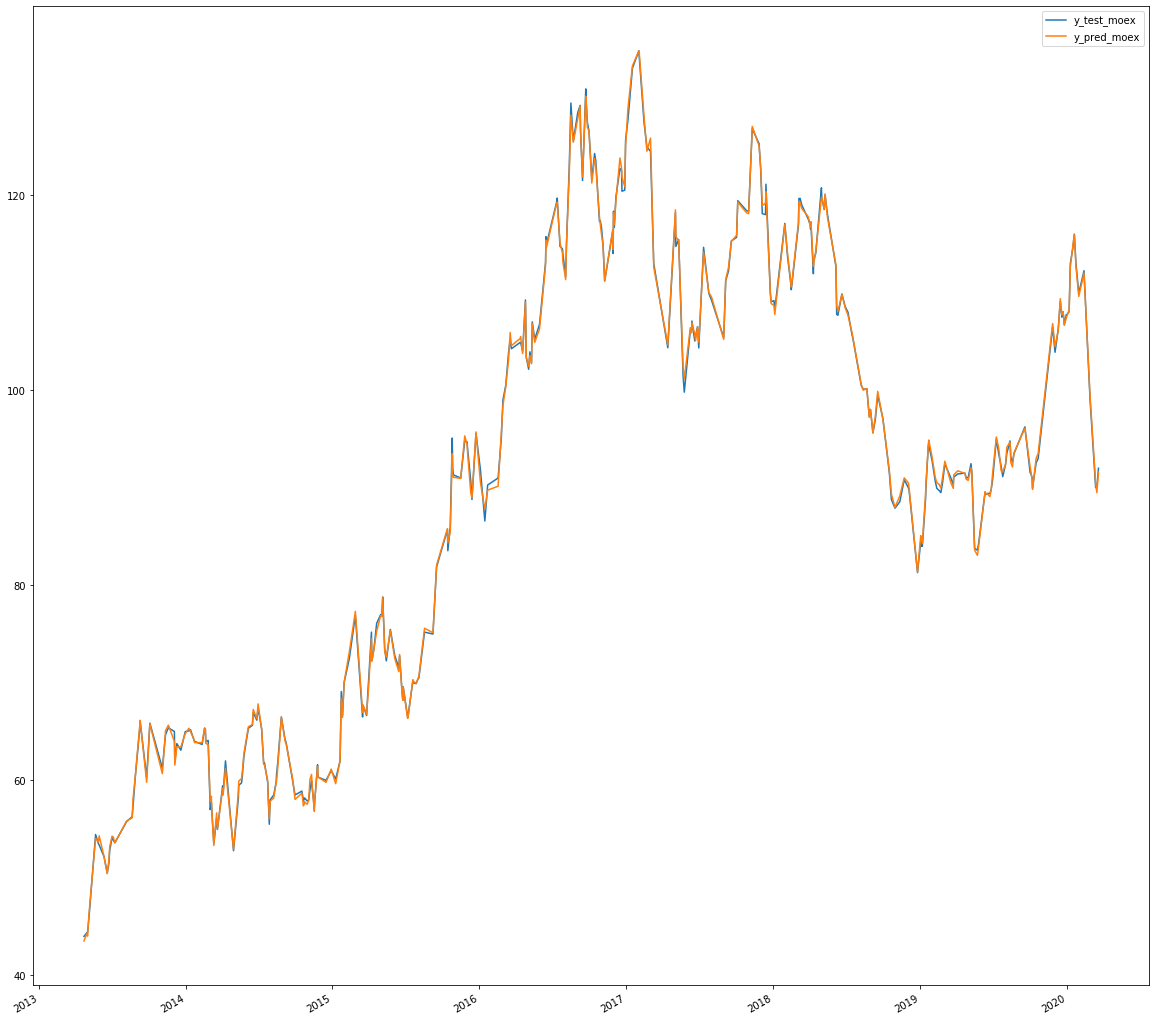

In [785]:
df1_moex = pd.DataFrame(y_test_moex)
df1_moex.columns = ['y_test_moex']
df1_moex['y_pred_moex'] = preds_moex
df1_moex.index = y_test_moex.index
df1_moex.plot(figsize=(20,20))

In [682]:
clf_hsi1 = svm.SVR(C=10000.0, epsilon=0.01, kernel='rbf')
clf_hsi2 = MLPRegressor(learning_rate='adaptive', learning_rate_init=0.01, max_iter=5000, hidden_layer_sizes=15, 
                    activation='identity', solver='lbfgs', alpha=0.03, batch_size=5, random_state=10)
clf_hsi3 = LinearRegression()

In [683]:
%%time
eclf_hsi = VotingRegressor(estimators=[
        ('svr', clf_hsi1), ('mlp', clf_hsi2), ('lr', clf_hsi3)], n_jobs=-1)
eclf_hsi.fit(X_train_hsi, y_train_hsi)
preds_hsi = eclf_hsi.predict(X_test_hsi)
print(mse(y_test_hsi, preds_hsi), rrmse(y_test_hsi, preds_hsi), mae(y_test_hsi, preds_hsi), mape(y_test_hsi, preds_hsi))

8850.602790037427 0.003752924870661385 71.33415669861328 0.28565624846935095
Wall time: 934 ms


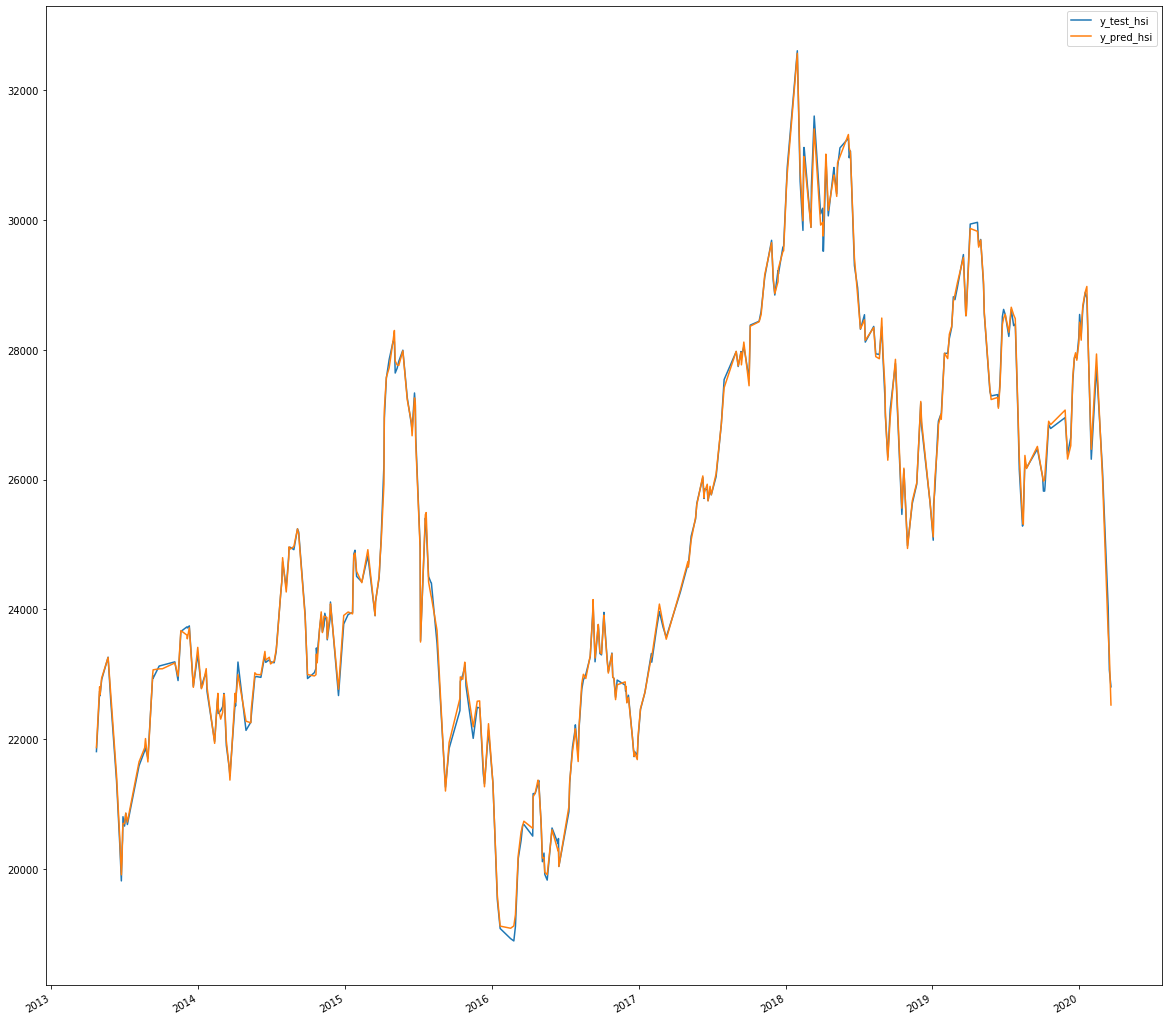

In [786]:
df1_hsi = pd.DataFrame(y_test_hsi)
df1_hsi.columns = ['y_test_hsi']
df1_hsi['y_pred_hsi'] = preds_hsi
df1_hsi.index = y_test_hsi.index
df1_hsi.plot(figsize=(20,20))

In [690]:
clf_NDX1 = svm.SVR(C=100000, epsilon=0.01, kernel='rbf')
clf_NDX2 = MLPRegressor(learning_rate='adaptive', learning_rate_init=0.01, max_iter=5000, hidden_layer_sizes=15, 
                    activation='identity', solver='lbfgs', alpha=0.03, batch_size=5, random_state=10)
clf_NDX3 = LinearRegression()

In [686]:
%%time
eclf_NDX = VotingRegressor(estimators=[
        ('svr', clf_NDX1)], n_jobs=-1)
eclf_NDX.fit(X_train_NDX, y_train_NDX)
preds_NDX = eclf_NDX.predict(X_test_NDX)
print(mse(y_test_NDX, preds_NDX), rrmse(y_test_NDX, preds_NDX), mae(y_test_NDX, preds_NDX), mape(y_test_NDX, preds_NDX))

813.1087824497998 0.005279314142837876 16.224056240101454 0.27977796211578915
Wall time: 1.47 s


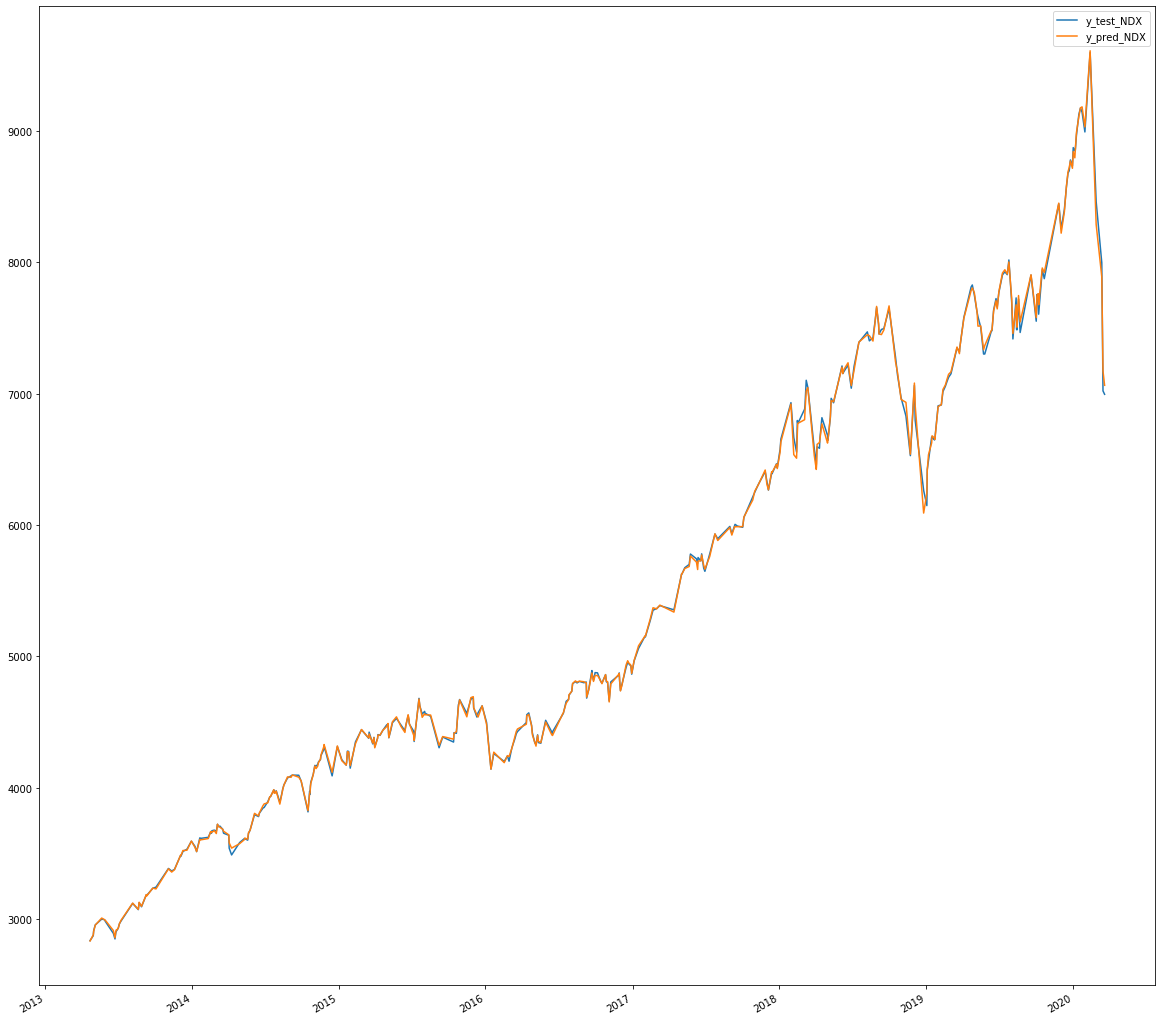

In [787]:
df1_NDX = pd.DataFrame(y_test_NDX)
df1_NDX.columns = ['y_test_NDX']
df1_NDX['y_pred_NDX'] = preds_NDX
df1_NDX.index = y_test_NDX.index
df1_NDX.plot(figsize=(20,20))

# Models for indicators from prices

In [687]:
t = range(len(df_moex)-5)

In [688]:
p = range(5,len(df_moex))

# MOEX

In [794]:
X_train_t1 = np.array(df_moex['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t1 = np.array(df_moex['SMA'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t1 = np.array(df_moex['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t1 = np.array(df_moex['SMA'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t2 = np.array(df_moex['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t2 = np.array(df_moex['EMA'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t2 = np.array(df_moex['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t2 = np.array(df_moex['EMA'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t3 = np.array(df_moex['mom'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t3 = np.array(df_moex['mom'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t3 = np.array(df_moex['mom'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t3 = np.array(df_moex['mom'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t4 = np.array(df_moex[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_t4 = np.array(df_moex['%K'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t4 = np.array(df_moex[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_t4 = np.array(df_moex['%K'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t5 = np.array(df_moex[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_t5 = np.array(df_moex['%D'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t5 = np.array(df_moex[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_t5 = np.array(df_moex['%D'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t6 = np.array(df_moex['EMA'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t6 = np.array(df_moex['MACD'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t6 = np.array(df_moex['EMA'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t6 = np.array(df_moex['MACD'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t7 = np.array(df_moex['mom'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t7 = np.array(df_moex['RSI'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t7 = np.array(df_moex['mom'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t7 = np.array(df_moex['RSI'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t8 = np.array(df_moex[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_t8 = np.array(df_moex['WR'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t8 = np.array(df_moex[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_t8 = np.array(df_moex['WR'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t9 = np.array(df_moex['EnBull'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t9 = np.array(df_moex['EnBull'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t9 = np.array(df_moex['EnBull'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t9 = np.array(df_moex['EnBull'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t10 = np.array(df_moex['CCI'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t10 = np.array(df_moex['CCI'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t10 = np.array(df_moex['CCI'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t10 = np.array(df_moex['CCI'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t11 = np.array(df_moex['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t11 = np.array(df_moex['bb_bbm'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t11 = np.array(df_moex['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t11 = np.array(df_moex['bb_bbm'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t12 = np.array(df_moex['high'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t12 = np.array(df_moex['mom'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t12 = np.array(df_moex['high'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t12 = np.array(df_moex['mom'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t13 = np.array(df_moex['low'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t13 = np.array(df_moex['bb_bbl'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t13 = np.array(df_moex['low'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t13 = np.array(df_moex['bb_bbl'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t14 = np.array(df_moex['BearPow'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t14 = np.array(df_moex['BearPow'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t14 = np.array(df_moex['BearPow'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t14 = np.array(df_moex['BearPow'].iloc[p[1464:]]).reshape(-1, 1)

X_train_t15 = np.array(df_moex['MACD_sig'].iloc[t[:1464]]).reshape(-1, 1)
y_train_t15 = np.array(df_moex['MACD_sig'].iloc[p[:1464]]).reshape(-1, 1)
X_test_t15 = np.array(df_moex['MACD_sig'].iloc[t[1464:]]).reshape(-1, 1)
y_test_t15 = np.array(df_moex['MACD_sig'].iloc[p[1464:]]).reshape(-1, 1)

# HSI

In [788]:
X_train_hsi1 = np.array(df_hsi['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi1 = np.array(df_hsi['SMA'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi1 = np.array(df_hsi['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi1 = np.array(df_hsi['SMA'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi2 = np.array(df_hsi['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi2 = np.array(df_hsi['EMA'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi2 = np.array(df_hsi['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi2 = np.array(df_hsi['EMA'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi3 = np.array(df_hsi['mom'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi3 = np.array(df_hsi['mom'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi3 = np.array(df_hsi['mom'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi3 = np.array(df_hsi['mom'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi4 = np.array(df_hsi[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_hsi4 = np.array(df_hsi['%K'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi4 = np.array(df_hsi[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_hsi4 = np.array(df_hsi['%K'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi5 = np.array(df_hsi[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_hsi5 = np.array(df_hsi['%D'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi5 = np.array(df_hsi[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_hsi5 = np.array(df_hsi['%D'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi6 = np.array(df_hsi['EMA'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi6 = np.array(df_hsi['MACD'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi6 = np.array(df_hsi['EMA'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi6 = np.array(df_hsi['MACD'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi7 = np.array(df_hsi['mom'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi7 = np.array(df_hsi['RSI'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi7 = np.array(df_hsi['mom'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi7 = np.array(df_hsi['RSI'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi8 = np.array(df_hsi[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_hsi8 = np.array(df_hsi['WR'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi8 = np.array(df_hsi[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_hsi8 = np.array(df_hsi['WR'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi9 = np.array(df_hsi['EnBull'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi9 = np.array(df_hsi['EnBull'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi9 = np.array(df_hsi['EnBull'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi9 = np.array(df_hsi['EnBull'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi10 = np.array(df_hsi['CCI'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi10 = np.array(df_hsi['CCI'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi10 = np.array(df_hsi['CCI'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi10 = np.array(df_hsi['CCI'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi11 = np.array(df_hsi['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi11 = np.array(df_hsi['bb_bbm'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi11 = np.array(df_hsi['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi11 = np.array(df_hsi['bb_bbm'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi12 = np.array(df_hsi['high'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi12 = np.array(df_hsi['mom'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi12 = np.array(df_hsi['high'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi12 = np.array(df_hsi['mom'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi13 = np.array(df_hsi['low'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi13 = np.array(df_hsi['bb_bbl'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi13 = np.array(df_hsi['low'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi13 = np.array(df_hsi['bb_bbl'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi14 = np.array(df_hsi['BearPow'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi14 = np.array(df_hsi['BearPow'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi14 = np.array(df_hsi['BearPow'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi14 = np.array(df_hsi['BearPow'].iloc[p[1464:]]).reshape(-1, 1)

X_train_hsi15 = np.array(df_hsi['MACD_sig'].iloc[t[:1464]]).reshape(-1, 1)
y_train_hsi15 = np.array(df_hsi['MACD_sig'].iloc[p[:1464]]).reshape(-1, 1)
X_test_hsi15 = np.array(df_hsi['MACD_sig'].iloc[t[1464:]]).reshape(-1, 1)
y_test_hsi15 = np.array(df_hsi['MACD_sig'].iloc[p[1464:]]).reshape(-1, 1)

# NDX

In [693]:
X_train_NDX1 = np.array(df_NDX['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX1 = np.array(df_NDX['SMA'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX1 = np.array(df_NDX['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX1 = np.array(df_NDX['SMA'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX2 = np.array(df_NDX['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX2 = np.array(df_NDX['EMA'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX2 = np.array(df_NDX['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX2 = np.array(df_NDX['EMA'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX3 = np.array(df_NDX['mom'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX3 = np.array(df_NDX['mom'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX3 = np.array(df_NDX['mom'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX3 = np.array(df_NDX['mom'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX4 = np.array(df_NDX[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_NDX4 = np.array(df_NDX['%K'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX4 = np.array(df_NDX[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_NDX4 = np.array(df_NDX['%K'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX5 = np.array(df_NDX[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_NDX5 = np.array(df_NDX['%D'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX5 = np.array(df_NDX[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_NDX5 = np.array(df_NDX['%D'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX6 = np.array(df_NDX['EMA'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX6 = np.array(df_NDX['MACD'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX6 = np.array(df_NDX['EMA'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX6 = np.array(df_NDX['MACD'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX7 = np.array(df_NDX['mom'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX7 = np.array(df_NDX['RSI'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX7 = np.array(df_NDX['mom'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX7 = np.array(df_NDX['RSI'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX8 = np.array(df_NDX[['Close', 'high', 'low']].iloc[t[:1464]])
y_train_NDX8 = np.array(df_NDX['WR'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX8 = np.array(df_NDX[['Close', 'high', 'low']].iloc[t[1464:]])
y_test_NDX8 = np.array(df_NDX['WR'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX9 = np.array(df_NDX['EnBull'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX9 = np.array(df_NDX['EnBull'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX9 = np.array(df_NDX['EnBull'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX9 = np.array(df_NDX['EnBull'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX10 = np.array(df_NDX['CCI'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX10 = np.array(df_NDX['CCI'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX10 = np.array(df_NDX['CCI'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX10 = np.array(df_NDX['CCI'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX11 = np.array(df_NDX['Close'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX11 = np.array(df_NDX['bb_bbm'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX11 = np.array(df_NDX['Close'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX11 = np.array(df_NDX['bb_bbm'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX12 = np.array(df_NDX['high'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX12 = np.array(df_NDX['mom'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX12 = np.array(df_NDX['high'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX12 = np.array(df_NDX['mom'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX13 = np.array(df_NDX['low'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX13 = np.array(df_NDX['bb_bbl'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX13 = np.array(df_NDX['low'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX13 = np.array(df_NDX['bb_bbl'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX14 = np.array(df_NDX['BearPow'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX14 = np.array(df_NDX['BearPow'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX14 = np.array(df_NDX['BearPow'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX14 = np.array(df_NDX['BearPow'].iloc[p[1464:]]).reshape(-1, 1)

X_train_NDX15 = np.array(df_NDX['MACD_sig'].iloc[t[:1464]]).reshape(-1, 1)
y_train_NDX15 = np.array(df_NDX['MACD_sig'].iloc[p[:1464]]).reshape(-1, 1)
X_test_NDX15 = np.array(df_NDX['MACD_sig'].iloc[t[1464:]]).reshape(-1, 1)
y_test_NDX15 = np.array(df_NDX['MACD_sig'].iloc[p[1464:]]).reshape(-1, 1)

# MOEX

In [825]:
svr1 = svm.SVR(kernel='rbf', gamma='scale', C=76, epsilon=0.02)
svr1.fit(X_train_t1, y_train_t1)
preds_1 = svr1.predict(X_test_t1)
print(mse(y_test_t1, preds_1), rrmse(y_test_t1, preds_1), mae(y_test_t1, preds_1), mape(y_test_t1, preds_1))

11.163934644307421 0.12353243432147207 2.4124620983026603 9.186359103744344


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [826]:
df_moex['SMA'].describe()

count    1835.000000
mean       89.841852
std        23.261821
min        45.368400
25%        65.106000
50%        92.450800
75%       111.126600
max       133.190800
Name: SMA, dtype: float64

In [827]:
svr2 = svm.SVR(kernel='rbf', gamma='scale', C=86, epsilon=0.02)
svr2.fit(X_train_t2, y_train_t2)
preds_2 = svr2.predict(X_test_t2)
mse2 = mse(y_test_t2, preds_2)
print(mse(y_test_t2, preds_2), rrmse(y_test_t2, preds_2), mae(y_test_t2, preds_2), mape(y_test_t2, preds_2))

24.736576533145897 0.12285145427343355 3.799330101921908 9.249083094135779


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [828]:
df_moex['EMA'].describe()

count    1835.000000
mean       89.473834
std        23.151386
min        47.371930
25%        64.163465
50%        91.792315
75%       110.250519
max       128.788921
Name: EMA, dtype: float64

In [829]:
svr3 = svm.SVR(kernel='rbf', gamma='scale', C=90, epsilon=0.00097)
svr3.fit(X_train_t3, y_train_t3)
preds_3 = svr3.predict(X_test_t3)
print(mse(y_test_t3, preds_3), rrmse(y_test_t3, preds_3), mae(y_test_t3, preds_3), mape(y_test_t3, preds_3))

16.315296022984917 33.080508642863705 3.101817745302779 inf


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [830]:
df_moex['mom'].describe()

count    1835.000000
mean        0.214496
std         4.701017
min       -20.380005
25%        -2.759998
50%         0.370003
75%         3.430000
max        18.170006
Name: mom, dtype: float64

In [831]:
svr4 = svm.SVR(kernel='rbf', gamma='scale', C=2000, epsilon=33)
svr4.fit(X_train_t4, y_train_t4)
preds_4 = svr4.predict(X_test_t4)
print(mse(y_test_t4, preds_4), rrmse(y_test_t4, preds_4), mae(y_test_t4, preds_4), mape(y_test_t4, preds_1))

952.1953112339351 0.5875190814532179 27.38533313823159 inf


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [832]:
df_moex['%K'].describe()

count    1835.000000
mean       52.305767
std        30.368887
min         0.000000
25%        24.999841
50%        54.219791
75%        80.010034
max       100.000000
Name: %K, dtype: float64

In [833]:
svr5 = svm.SVR(kernel='rbf', gamma='scale', epsilon=100)
svr5.fit(X_train_t5, y_train_t5)
preds_5 = svr5.predict(X_test_t5)
mse5 = mse(y_test_t5, preds_5)
print(mse(y_test_t5, preds_5), rrmse(y_test_t5, preds_5), mae(y_test_t5, preds_5), mape(y_test_t5, preds_5))

899.2785491141553 0.5521136766987413 27.17236085093309 126.99511298384793


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [834]:
df_moex['%D'].describe()

count    1835.000000
mean       52.273666
std        28.445336
min         0.000000
25%        26.423826
50%        54.418079
75%        78.959012
max        99.473256
Name: %D, dtype: float64

In [835]:
svr6 = svm.SVR(kernel='rbf', gamma='scale', C=1, epsilon=10)
svr6.fit(X_train_t6, y_train_t6)
preds_6 = svr6.predict(X_test_t6)
mse6 = mse(y_test_t6, preds_6)
print(mse(y_test_t6, preds_6), rrmse(y_test_t6, preds_6), mae(y_test_t6, preds_6), mape(y_test_t6, preds_6))

2.9813112108566293 19.35751761526438 1.3436567652778992 291.428686234328


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [836]:
df_moex['MACD'].describe()

count    1835.000000
mean        0.166238
std         1.542975
min        -6.466895
25%        -0.699996
50%         0.296317
75%         1.225886
max         3.781420
Name: MACD, dtype: float64

In [837]:
svr7 = svm.SVR(kernel='rbf', gamma='scale', C=1934, epsilon=1.1)
svr7.fit(X_train_t7, y_train_t7)
preds_7 = svr7.predict(X_test_t7)
mse7 = mse(y_test_t7, preds_7)
print(mse(y_test_t7, preds_7), rrmse(y_test_t7, preds_7), mae(y_test_t7, preds_7), mape(y_test_t7, preds_7))

314.00054658763355 0.4107442079254643 14.535533749990313 60.4630497778883


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [838]:
df_moex['RSI'].describe()

count    1835.000000
mean       51.337371
std        17.399018
min         5.141446
25%        39.350212
50%        51.844534
75%        63.576911
max        96.034448
Name: RSI, dtype: float64

In [839]:
svr8 = svm.SVR(kernel='rbf', gamma='scale', C=480, epsilon=12)
svr8.fit(X_train_t8, y_train_t8)
preds_8 = svr8.predict(X_test_t8)
print(mse(y_test_t8, preds_8), rrmse(y_test_t8, preds_8), mae(y_test_t8, preds_8), mape(y_test_t8, preds_8))

939.8782775849311 -0.6964748372530647 27.11762033193209 inf


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [840]:
df_moex['WR'].describe()

count    1835.000000
mean      -47.694233
std        30.368887
min      -100.000000
25%       -75.000159
50%       -45.780209
75%       -19.989966
max        -0.000000
Name: WR, dtype: float64

In [841]:
svr9 = svm.SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.11)
svr9.fit(X_train_t9, y_train_t9)
preds_9 = svr9.predict(X_test_t9)
print(mse(y_test_t9, preds_9), rrmse(y_test_t9, preds_9), mae(y_test_t9, preds_9), mape(y_test_t9, preds_9))

3.279900541199311 2.461778952073976 1.3744826626958648 953.0586341765867


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [842]:
df_moex['EnBull'].describe()

count    1835.000000
mean        1.246000
std         2.240242
min        -7.334770
25%        -0.132209
50%         1.161691
75%         2.628749
max        11.152177
Name: EnBull, dtype: float64

In [843]:
svr10 = svm.SVR(kernel='rbf', gamma='scale', C=1000, epsilon=0.15)
svr10.fit(X_train_t10, y_train_t10)
preds_10 = svr10.predict(X_test_t10)
print(mse(y_test_t10, preds_10), rrmse(y_test_t10, preds_10), mae(y_test_t10, preds_10), mape(y_test_t10, preds_10))

5895.656762941094 8.337966073538436 57.86016761670691 443.6621239167467


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [844]:
df_moex['CCI'].describe()

count    1835.000000
mean        6.697722
std        87.406745
min      -241.497050
25%       -65.155867
50%        11.347889
75%        77.663735
max       242.734300
Name: CCI, dtype: float64

In [845]:
svr11 = svm.SVR(kernel='rbf', gamma='scale', epsilon=0.003, C=250)
svr11.fit(X_train_t11, y_train_t11)
preds_11 = svr11.predict(X_test_t11)
print(mse(y_test_t11, preds_11), rrmse(y_test_t11, preds_11), mae(y_test_t11, preds_11), mape(y_test_t11, preds_11))

6.183408629171307 0.12229103563840908 1.8024337854015549 9.040571744581895


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [846]:
svr12 = svm.SVR(kernel='rbf', gamma='scale', epsilon=0.0003, C=0.9)
svr12.fit(X_train_t12, y_train_t12)
preds_12 = svr12.predict(X_test_t12)
print(mse(y_test_t12, preds_12), rrmse(y_test_t12, preds_12), mae(y_test_t12, preds_12), mape(y_test_t12, preds_12))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23.51436353897469 30.43783530655594 3.5003779497932968 inf


C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [847]:
svr13 = svm.SVR(kernel='rbf', gamma='scale', epsilon=0.00003, C=62)
svr13.fit(X_train_t13, y_train_t13)
preds_13 = svr13.predict(X_test_t13)
print(mse(y_test_t13, preds_13), rrmse(y_test_t13, preds_13), mae(y_test_t13, preds_13), mape(y_test_t13, preds_13))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8.710160663334449 0.1313434162514998 2.368688233156871 9.946241805432564


In [848]:
svr14 = svm.SVR(kernel='rbf', gamma='scale', epsilon=1, C=1)
svr14.fit(X_train_t14, y_train_t14)
preds_14 = svr14.predict(X_test_t14)
print(mse(y_test_t14, preds_14), rrmse(y_test_t14, preds_14), mae(y_test_t14, preds_14), mape(y_test_t14, preds_14))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4.80560908901555 -3.0372457567112185 1.3938361562956214 260.74304923896216


In [849]:
svr15 = svm.SVR(kernel='rbf', gamma='scale', epsilon=0.00001, C=1000)
svr15.fit(X_train_t15, y_train_t15)
preds_15 = svr15.predict(X_test_t15)
print(mse(y_test_t15, preds_15), rrmse(y_test_t15, preds_15), mae(y_test_t15, preds_15), mape(y_test_t15, preds_15))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5588097281081221 19.639713956715713 0.5151332465862061 458.2176554173865


In [875]:
X_test_res_moex = [preds1, preds2, preds3, preds4, preds5, preds6, preds7, preds9, preds11, preds12, preds13, preds14]

In [876]:
X_test_res_moex = pd.DataFrame.from_records(X_test_res_moex)
X_test_res_moex = X_test_res_moex.T

In [877]:
X_test_res_moex.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [878]:
y_test_res_moex = df_moex['Close'].iloc[p[1464:]]

In [879]:
preds_res_moex = eclf_moex.predict(X_test_res_moex)
mse_moex = met.mean_squared_error(y_test_res_moex, preds_res_moex)
mse_moex

11.395715822441739

In [880]:
print(mse(y_test_res_moex, preds_res_moex), rrmse(y_test_res_moex, preds_res_moex), mae(y_test_res_moex, preds_res_moex), 
      mape(y_test_res_moex, preds_res_moex))

11.395715822441739 0.03558429890127064 2.4085899173998393 2.57215450888053


In [881]:
math.sqrt(mse_moex)

3.375754111667753

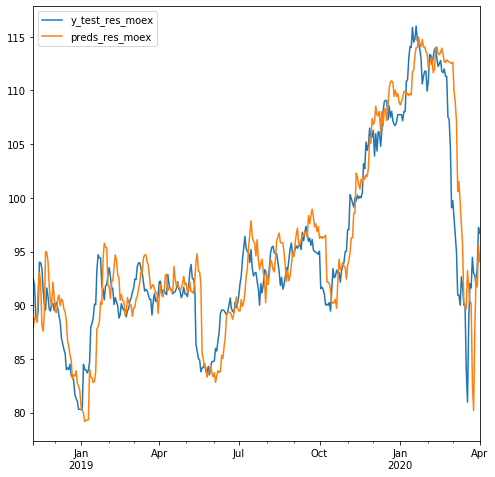

In [882]:
df2 = pd.DataFrame(y_test_res_moex)
df2.columns = ['y_test_res_moex']
df2['preds_res_moex'] = preds_res_moex
df2.index = y_test_res_moex.index
df2.plot(figsize=(8,8))

In [858]:
#import pickle
#filename = 'last_model.sav'
#pickle.dump(eclf2, open(filename, 'wb'))

# HSI

In [732]:
svr_hsi1 = LinearRegression()
svr_hsi1.fit(X_train_hsi1, y_train_hsi1)
preds_hsi1 = svr_hsi1.predict(X_test_hsi1)
mse(y_test_hsi1, preds_hsi1)

440483.3110447385

In [733]:
svr_hsi1 = svm.SVR(kernel='poly', gamma='scale', C=1000, epsilon=0.1)
svr_hsi1.fit(X_train_hsi1, y_train_hsi1)
preds_hsi1 = svr_hsi1.predict(X_test_hsi1)
print(mse(y_test_hsi1, preds_hsi1), rrmse(y_test_hsi1, preds_hsi1), mae(y_test_hsi1, preds_hsi1), mape(y_test_hsi1, preds_hsi1))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


625914.7953507554 0.07333159058859569 606.8987841855568 5.831074423838074


In [734]:
svr_hsi2 = svm.SVR(kernel='rbf', gamma='scale', C=2000, epsilon=200)
svr_hsi2.fit(X_train_hsi2, y_train_hsi2)
preds_hsi2 = svr_hsi2.predict(X_test_hsi2)
print(mse(y_test_hsi2, preds_hsi2), rrmse(y_test_hsi2, preds_hsi2), mae(y_test_hsi2, preds_hsi2), mape(y_test_hsi2, preds_hsi2))

881294.868937221 0.06594735169892016 731.9867480506794 5.214116849475696


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [735]:
svr_hsi3 = svm.SVR(kernel='rbf', gamma='scale', C=3000, epsilon=300)
svr_hsi3.fit(X_train_hsi3, y_train_hsi3)
preds_hsi3 = svr_hsi3.predict(X_test_hsi3)
print(mse(y_test_hsi3, preds_hsi3), rrmse(y_test_hsi3, preds_hsi3), mae(y_test_hsi3, preds_hsi3), mape(y_test_hsi3, preds_hsi3))

808601.3572995364 -17.94643575523926 699.2138142033918 251.92805323344095


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [736]:
svr_hsi4 = svm.SVR(kernel='rbf', gamma='scale', C=4000, epsilon=400)
svr_hsi4.fit(X_train_hsi4, y_train_hsi4)
preds_hsi4 = svr_hsi4.predict(X_test_hsi4)
print(mse(y_test_hsi4, preds_hsi4), rrmse(y_test_hsi4, preds_hsi4), mae(y_test_hsi4, preds_hsi4), mape(y_test_hsi4, preds_hsi4))

1121.2617801829724 0.6172362047261625 30.060673044589098 258.9107425536539


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [737]:
svr_hsi5 = svm.SVR(kernel='rbf', gamma='scale', C=5000, epsilon=500)
svr_hsi5.fit(X_train_hsi5, y_train_hsi5)
preds_hsi5 = svr_hsi5.predict(X_test_hsi5)
print(mse(y_test_hsi5, preds_hsi5), rrmse(y_test_hsi5, preds_hsi5), mae(y_test_hsi5, preds_hsi5), mape(y_test_hsi5, preds_hsi5))

982.6371560706614 0.5774716455716518 28.177437816268604 132.140310466379


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [738]:
svr_hsi6 = svm.SVR(kernel='rbf', gamma='scale', C=6000, epsilon=600)
svr_hsi6.fit(X_train_hsi6, y_train_hsi6)
preds_hsi6 = svr_hsi6.predict(X_test_hsi6)
print(mse(y_test_hsi6, preds_hsi6), rrmse(y_test_hsi6, preds_hsi6), mae(y_test_hsi6, preds_hsi6), mape(y_test_hsi6, preds_hsi6))

145365.2220322346 -16.70624016508452 298.8054923860923 227.15018353955122


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [739]:
svr_hsi7 = svm.SVR(kernel='rbf', gamma='scale', C=7000, epsilon=700)
svr_hsi7.fit(X_train_hsi7, y_train_hsi7)
preds_hsi7 = svr_hsi7.predict(X_test_hsi7)
print(mse(y_test_hsi7, preds_hsi7), rrmse(y_test_hsi7, preds_hsi7), mae(y_test_hsi7, preds_hsi7), mape(y_test_hsi7, preds_hsi7))

342.9150121460452 0.36317961766077317 15.640113699499276 45.61026658499273


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [740]:
svr_hsi8 = svm.SVR(kernel='rbf', gamma='scale', C=8000, epsilon=800)
svr_hsi8.fit(X_train_hsi8, y_train_hsi8)
preds_hsi8 = svr_hsi8.predict(X_test_hsi8)
print(mse(y_test_hsi8, preds_hsi8), rrmse(y_test_hsi8, preds_hsi8), mae(y_test_hsi8, preds_hsi8), mape(y_test_hsi8, preds_hsi8))

1121.2617801829724 -0.7319227173353327 30.060673044589098 inf


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [741]:
svr_hsi9 = svm.SVR(kernel='rbf', gamma='scale', C=9000, epsilon=900)
svr_hsi9.fit(X_train_hsi9, y_train_hsi9)
preds_hsi9 = svr_hsi9.predict(X_test_hsi9)
print(mse(y_test_hsi9, preds_hsi9), rrmse(y_test_hsi9, preds_hsi9), mae(y_test_hsi9, preds_hsi9), mape(y_test_hsi9, preds_hsi9))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


238810.54746833656 5.251978756689234 371.47097803961884 399.5600328572395


In [742]:
svr_hsi10 = svm.SVR(kernel='rbf', gamma='scale', C=10000, epsilon=1000)
svr_hsi10.fit(X_train_hsi10, y_train_hsi10)
preds_hsi10 = svr_hsi10.predict(X_test_hsi10)
print(mse(y_test_hsi10, preds_hsi10), rrmse(y_test_hsi10, preds_hsi10), mae(y_test_hsi10, preds_hsi10), mape(y_test_hsi10, preds_hsi10))

8503.96758731898 15.070501339653969 80.11991739734329 106.34174210383247


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [743]:
svr_hsi11 = svm.SVR(kernel='rbf', gamma='scale', C=11000, epsilon=1100)
svr_hsi11.fit(X_train_hsi11, y_train_hsi11)
preds_hsi11 = svr_hsi11.predict(X_test_hsi11)
print(mse(y_test_hsi11, preds_hsi11), rrmse(y_test_hsi11, preds_hsi11), mae(y_test_hsi11, preds_hsi11), mape(y_test_hsi11, preds_hsi11))

311804.6684811887 0.07177659926071547 437.6940555846986 5.658995410894041


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [744]:
svr_hsi12 = svm.SVR(kernel='rbf', gamma='scale', C=12000, epsilon=1200)
svr_hsi12.fit(X_train_hsi12, y_train_hsi12)
preds_hsi12 = svr_hsi12.predict(X_test_hsi12)
print(mse(y_test_hsi12, preds_hsi12), rrmse(y_test_hsi12, preds_hsi12), mae(y_test_hsi12, preds_hsi12), mape(y_test_hsi12, preds_hsi12))

1143035.4234641576 -16.05962587434082 824.9506221114747 140.12501059084272


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [745]:
svr_hsi13 = svm.SVR(kernel='rbf', gamma='scale', C=13000, epsilon=1300)
svr_hsi13.fit(X_train_hsi13, y_train_hsi13)
preds_hsi13 = svr_hsi13.predict(X_test_hsi13)
print(mse(y_test_hsi13, preds_hsi13), rrmse(y_test_hsi13, preds_hsi13), mae(y_test_hsi13, preds_hsi13), mape(y_test_hsi13, preds_hsi13))

402318.9874674337 0.08332377768245894 533.890563247336 6.553444793028962


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [746]:
svr_hsi14 = svm.SVR(kernel='rbf', gamma='scale', C=14000, epsilon=1400)
svr_hsi14.fit(X_train_hsi14, y_train_hsi14)
preds_hsi14 = svr_hsi14.predict(X_test_hsi14)
print(mse(y_test_hsi14, preds_hsi14), rrmse(y_test_hsi14, preds_hsi14), mae(y_test_hsi14, preds_hsi14), mape(y_test_hsi14, preds_hsi14))

405229.80199093407 -3.426851852648563 504.66581753014265 1233.816575839528


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [747]:
svr_hsi15 = svm.SVR(kernel='rbf', gamma='scale', C=15000, epsilon=1500)
svr_hsi15.fit(X_train_hsi15, y_train_hsi15)
preds_hsi15 = svr_hsi15.predict(X_test_hsi15)
print(mse(y_test_hsi15, preds_hsi15), rrmse(y_test_hsi15, preds_hsi15), mae(y_test_hsi15, preds_hsi15), mape(y_test_hsi15, preds_hsi15))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


106321.36298322157 -19.47978555349392 258.21037844607145 142.65290236203262


In [748]:
X_test_res_hsi = [preds_hsi1, preds_hsi2, preds_hsi3, preds_hsi4, preds_hsi5, preds_hsi6, preds_hsi7, preds_hsi9, preds_hsi11, preds_hsi12, preds_hsi13, preds_hsi14]

In [749]:
X_test_res_hsi = pd.DataFrame.from_records(X_test_res_hsi)
X_test_res_hsi = X_test_res_hsi.T

In [750]:
X_test_res_hsi.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [751]:
y_test_res_hsi = df_hsi['Close'].iloc[p[1464:]]

In [752]:
preds_res_hsi = eclf_hsi.predict(X_test_res_hsi)
mse_res_hsi = met.mean_squared_error(y_test_res_hsi, preds_res_hsi)
mse_res_hsi

15006159.873369666

In [753]:
math.sqrt(mse_res_hsi)

3873.778500814117

In [754]:
df_hsi['Close'].describe()

count     1835.000000
mean     24995.734883
std       3048.255478
min      18319.580078
25%      22703.735352
50%      24392.050781
75%      27554.300781
max      33154.121094
Name: Close, dtype: float64

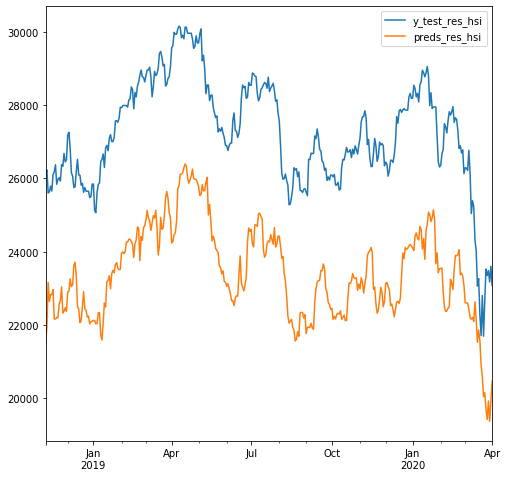

In [755]:
df2_hsi = pd.DataFrame(y_test_res_hsi)
df2_hsi.columns = ['y_test_res_hsi']
df2_hsi['preds_res_hsi'] = preds_res_hsi
df2_hsi.index = y_test_res_hsi.index
df2_hsi.plot(figsize=(8,8))

# NDX

In [428]:
svr_NDX1 = svm.SVR(kernel='linear', gamma='auto', C=1000, epsilon=0.01)
svr_NDX1.fit(X_train_NDX1, y_train_NDX1)
preds_NDX1 = svr_NDX1.predict(X_test_NDX1)
print(mse(y_test_NDX1, preds_NDX1), rrmse(y_test_NDX1, preds_NDX1), mae(y_test_NDX1, preds_NDX1), mape(y_test_NDX1, preds_NDX1))

C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9134795.454379736 0.41185296368906116 3012.584699410682 38.57226594767337


In [445]:
svr_NDX2 = svm.SVR(kernel='rbf', gamma='scale', C=1, epsilon=0.0001)
svr_NDX2.fit(X_train_NDX2, y_train_NDX2)
preds_NDX2 = svr_NDX2.predict(X_test_NDX2)
print(mse(y_test_NDX2, preds_NDX2), rrmse(y_test_NDX2, preds_NDX2), mae(y_test_NDX2, preds_NDX2), mape(y_test_NDX2, preds_NDX2))

8545660.470540535 0.37942451958979256 2819.66061101727 36.40011886589233


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [453]:
svr_NDX3 = svm.SVR(kernel='rbf', gamma='scale', C=100, epsilon=0.01)
svr_NDX3.fit(X_train_NDX3, y_train_NDX3)
preds_NDX3 = svr_NDX3.predict(X_test_NDX3)
print(mse(y_test_NDX3, preds_NDX3), rrmse(y_test_NDX3, preds_NDX3), mae(y_test_NDX3, preds_NDX3), mape(y_test_NDX3, preds_NDX3))

115295.92463630508 23.740450174063028 226.77402870309416 153.98254232420027


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
svr_NDX4 = svm.SVR(kernel='rbf', gamma='scale', C=0.01, epsilon=10)
svr_NDX4.fit(X_train_NDX4, y_train_NDX4)
preds_NDX4 = svr_NDX4.predict(X_test_NDX4)
print(mse(y_test_NDX4, preds_NDX4), rrmse(y_test_NDX4, preds_NDX4), mae(y_test_NDX4, preds_NDX4), mape(y_test_NDX4, preds_NDX4))

974.9646209382598 0.5743359516715494 27.912053806374328 inf


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
svr_NDX5 = svm.SVR(kernel='rbf', gamma='scale', C=500, epsilon=0.09)
svr_NDX5.fit(X_train_NDX5, y_train_NDX5)
preds_NDX5 = svr_NDX5.predict(X_test_NDX5)
print(mse(y_test_NDX5, preds_NDX5), rrmse(y_test_NDX5, preds_NDX5), mae(y_test_NDX5, preds_NDX5), mape(y_test_NDX5, preds_NDX5))

946.2403244073189 0.509092731141682 26.55699771452831 95.78067553819702


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [174]:
svr_NDX6 = svm.SVR(kernel='rbf', gamma='scale', C=6, epsilon=6)
svr_NDX6.fit(X_train_NDX6, y_train_NDX6)
preds_NDX6 = svr_NDX6.predict(X_test_NDX6)
print(mse(y_test_NDX6, preds_NDX6), rrmse(y_test_NDX6, preds_NDX6), mae(y_test_NDX6, preds_NDX6), mape(y_test_NDX6, preds_NDX6))

16863.17175812659 7.109302470959908 96.94239075222674 124.53443494823581


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
svr_NDX7 = svm.SVR(kernel='rbf', gamma='scale', C=5, epsilon=0.001)
svr_NDX7.fit(X_train_NDX7, y_train_NDX7)
preds_NDX7 = svr_NDX7.predict(X_test_NDX7)
print(mse(y_test_NDX7, preds_NDX7), rrmse(y_test_NDX7, preds_NDX7), mae(y_test_NDX7, preds_NDX7), mape(y_test_NDX7, preds_NDX7))

243.48845835970354 0.33134446776315835 12.421669216454825 36.55324396664994


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [176]:
svr_NDX8 = svm.SVR(kernel='rbf', gamma='scale', C=0.01, epsilon=50)
svr_NDX8.fit(X_train_NDX8, y_train_NDX8)
preds_NDX8 = svr_NDX8.predict(X_test_NDX8)
print(mse(y_test_NDX8, preds_NDX8), rrmse(y_test_NDX8, preds_NDX8), mae(y_test_NDX8, preds_NDX8), mape(y_test_NDX8, preds_NDX8))

1237.6383486466136 -1.0505470987034102 31.959251284565955 inf


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [177]:
svr_NDX9 = svm.SVR(kernel='rbf', gamma='scale')
svr_NDX9.fit(X_train_NDX9, y_train_NDX9)
preds_NDX9 = svr_NDX9.predict(X_test_NDX9)
print(mse(y_test_NDX9, preds_NDX9), rrmse(y_test_NDX9, preds_NDX9), mae(y_test_NDX9, preds_NDX9), mape(y_test_NDX9, preds_NDX9))

21226.42302088816 2.362566994562987 103.13793981548244 136.31513738632054


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
svr_NDX10 = svm.SVR(kernel='rbf', gamma='scale', C=10, epsilon=50)
svr_NDX10.fit(X_train_NDX10, y_train_NDX10)
preds_NDX10 = svr_NDX10.predict(X_test_NDX10)
print(mse(y_test_NDX10, preds_NDX10), rrmse(y_test_NDX10, preds_NDX10), mae(y_test_NDX10, preds_NDX10), mape(y_test_NDX10, preds_NDX10))

5486.810439154816 2.985361178515914 58.51408531263477 146.49366424237843


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [756]:
svr_NDX11 = svm.SVR(kernel='rbf', gamma='scale', C=10, epsilon=1)
svr_NDX11.fit(X_train_NDX11, y_train_NDX11)
preds_NDX11 = svr_NDX11.predict(X_test_NDX11)
print(mse(y_test_NDX11, preds_NDX11), rrmse(y_test_NDX11, preds_NDX11), mae(y_test_NDX11, preds_NDX11), mape(y_test_NDX11, preds_NDX11))

3527747.4080005023 0.22099457030514333 1447.8656239577933 18.15027156652866


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [757]:
svr_NDX12 = svm.SVR(kernel='rbf', gamma='scale')
svr_NDX12.fit(X_train_NDX12, y_train_NDX12)
preds_NDX12 = svr_NDX12.predict(X_test_NDX12)
print(mse(y_test_NDX12, preds_NDX12), rrmse(y_test_NDX12, preds_NDX12), mae(y_test_NDX12, preds_NDX12), mape(y_test_NDX12, preds_NDX12))

135150.26326527089 22.911023048756036 250.01333979019356 111.35003717662259


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [758]:
svr_NDX13 = svm.SVR(kernel='rbf', gamma='scale', C=13, epsilon=0.1)
svr_NDX13.fit(X_train_NDX13, y_train_NDX13)
preds_NDX13 = svr_NDX13.predict(X_test_NDX13)
print(mse(y_test_NDX13, preds_NDX13), rrmse(y_test_NDX13, preds_NDX13), mae(y_test_NDX13, preds_NDX13), mape(y_test_NDX13, preds_NDX13))

2889133.037209261 0.20731200017132032 1272.9665144645508 16.71573798903073


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [759]:
svr_NDX14 = svm.SVR(kernel='rbf', gamma='scale', C=0.5, epsilon=0.02)
svr_NDX14.fit(X_train_NDX14, y_train_NDX14)
preds_NDX14 = svr_NDX14.predict(X_test_NDX14)
print(mse(y_test_NDX14, preds_NDX14), rrmse(y_test_NDX14, preds_NDX14), mae(y_test_NDX14, preds_NDX14), mape(y_test_NDX14, preds_NDX14))

50862.5178684478 -4.603361954951283 135.15705309544865 118.36832767900498


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [760]:
svr_NDX15 = svm.SVR(kernel='rbf', gamma='scale', C=0.5, epsilon=0.02)
svr_NDX15.fit(X_train_NDX15, y_train_NDX15)
preds_NDX15 = svr_NDX15.predict(X_test_NDX15)
print(mse(y_test_NDX15, preds_NDX15), rrmse(y_test_NDX15, preds_NDX15), mae(y_test_NDX15, preds_NDX15), mape(y_test_NDX15, preds_NDX15))

10960.4976631491 5.678653221832926 74.23507976950997 215.7275096562305


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [761]:
X_test_res_NDX = [preds_NDX1, preds_NDX2, preds_NDX3, preds_NDX4, preds_NDX5, preds_NDX6, preds_NDX7, preds_NDX9, preds_NDX11, preds_NDX12, preds_NDX13, preds_NDX14]

In [762]:
X_test_res_NDX = pd.DataFrame.from_records(X_test_res_NDX)
X_test_res_NDX = X_test_res_NDX.T

In [763]:
X_test_res_NDX.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [764]:
y_test_res_NDX = df_NDX['Close'].iloc[p[1464:]]

In [765]:
preds_res_NDX = eclf_NDX.predict(X_test_res_NDX)
mse_res_NDX = met.mean_squared_error(y_test_res_NDX, preds_res_NDX)
mse_res_NDX

9760851.519273436

In [766]:
math.sqrt(mse_res_NDX)

3124.2361497289917

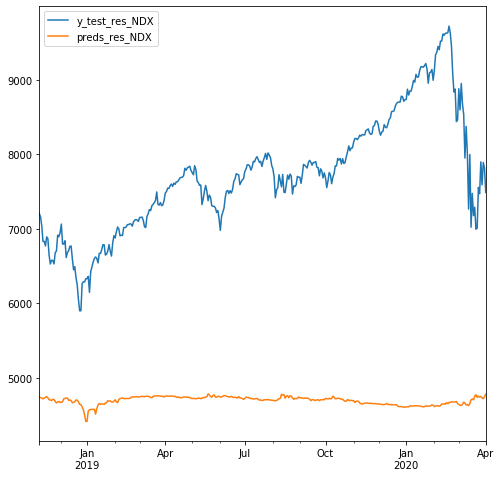

In [767]:
df2_NDX = pd.DataFrame(y_test_res_NDX)
df2_NDX.columns = ['y_test_res_NDX']
df2_NDX['preds_res_NDX'] = preds_res_NDX
df2_NDX.index = y_test_res_NDX.index
df2_NDX.plot(figsize=(8,8))

# Accuracy of models

In [956]:
mse_list_moex = [mse(y_test_t1, preds_1), mse(y_test_t2, preds_2), mse(y_test_t3, preds_3),
                mse(y_test_t4, preds_4), mse(y_test_t5, preds_5), mse(y_test_t6, preds_6),
                mse(y_test_t7, preds_7), mse(y_test_t8, preds_8), mse(y_test_t9, preds_9),
                mse(y_test_t10, preds_10), mse(y_test_t11, preds_11), mse(y_test_t12, preds_12),
                mse(y_test_t13, preds_13), mse(y_test_t14, preds_14), mse(y_test_t15, preds_15)]
rrmse_list_moex = [rrmse(y_test_t1, preds_1), rrmse(y_test_t2, preds_2), rrmse(y_test_t3, preds_3),
                  rrmse(y_test_t4, preds_4), rrmse(y_test_t5, preds_5), rrmse(y_test_t6, preds_6),
                  rrmse(y_test_t7, preds_7), rrmse(y_test_t8, preds_8), rrmse(y_test_t9, preds_9),
                  rrmse(y_test_t10, preds_10), rrmse(y_test_t11, preds_11), rrmse(y_test_t12, preds_12),
                  rrmse(y_test_t13, preds_13), rrmse(y_test_t14, preds_14), rrmse(y_test_t15, preds_15)]
mae_list_moex = [mae(y_test_t1, preds_1), mae(y_test_t2, preds_2), mae(y_test_t3, preds_3),
                mae(y_test_t4, preds_4), mae(y_test_t5, preds_5), mae(y_test_t6, preds_6),
                mae(y_test_t7, preds_7), mae(y_test_t8, preds_8), mae(y_test_t9, preds_9),
                mae(y_test_t10, preds_10), mae(y_test_t11, preds_11), mae(y_test_t12, preds_12),
                mae(y_test_t13, preds_13), mae(y_test_t14, preds_14), mae(y_test_t15, preds_15)]
mape_list_moex = [mape(y_test_t1, preds_1), mape(y_test_t2, preds_2), mape(y_test_t3, preds_3),
                 mape(y_test_t4, preds_4), mape(y_test_t5, preds_5), mape(y_test_t6, preds_6), 
                 mape(y_test_t7, preds_7), mape(y_test_t8, preds_8), mape(y_test_t9, preds_9),
                 mape(y_test_t10, preds_10), mape(y_test_t11, preds_11), mape(y_test_t12, preds_12),
                 mape(y_test_t13, preds_13), mape(y_test_t14, preds_14), mape(y_test_t15, preds_15)]

C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [860]:
mse_list_hsi = [mse(y_test_hsi1, preds_hsi1), mse(y_test_hsi2, preds_hsi2), mse(y_test_hsi3, preds_hsi3),
                mse(y_test_hsi4, preds_hsi4), mse(y_test_hsi5, preds_hsi5), mse(y_test_hsi6, preds_hsi6),
                mse(y_test_hsi7, preds_hsi7), mse(y_test_hsi8, preds_hsi8), mse(y_test_hsi9, preds_hsi9),
                mse(y_test_hsi10, preds_hsi10), mse(y_test_hsi11, preds_hsi11), mse(y_test_hsi12, preds_hsi12),
                mse(y_test_hsi13, preds_hsi13), mse(y_test_hsi14, preds_hsi14), mse(y_test_hsi15, preds_hsi15)]
rrmse_list_hsi = [rrmse(y_test_hsi1, preds_hsi1), rrmse(y_test_hsi2, preds_hsi2), rrmse(y_test_hsi3, preds_hsi3),
                  rrmse(y_test_hsi4, preds_hsi4), rrmse(y_test_hsi5, preds_hsi5), rrmse(y_test_hsi6, preds_hsi6),
                  rrmse(y_test_hsi7, preds_hsi7), rrmse(y_test_hsi8, preds_hsi8), rrmse(y_test_hsi9, preds_hsi9),
                  rrmse(y_test_hsi10, preds_hsi10), rrmse(y_test_hsi11, preds_hsi11), rrmse(y_test_hsi12, preds_hsi12),
                  rrmse(y_test_hsi13, preds_hsi13), rrmse(y_test_hsi14, preds_hsi14), rrmse(y_test_hsi15, preds_hsi15)]
mae_list_hsi = [mae(y_test_hsi1, preds_hsi1), mae(y_test_hsi2, preds_hsi2), mae(y_test_hsi3, preds_hsi3),
                mae(y_test_hsi4, preds_hsi4), mae(y_test_hsi5, preds_hsi5), mae(y_test_hsi6, preds_hsi6),
                mae(y_test_hsi7, preds_hsi7), mae(y_test_hsi8, preds_hsi8), mae(y_test_hsi9, preds_hsi9),
                mae(y_test_hsi10, preds_hsi10), mae(y_test_hsi11, preds_hsi11), mae(y_test_hsi12, preds_hsi12),
                mae(y_test_hsi13, preds_hsi13), mae(y_test_hsi14, preds_hsi14), mae(y_test_hsi15, preds_hsi15)]
mape_list_hsi = [mape(y_test_hsi1, preds_hsi1), mape(y_test_hsi2, preds_hsi2), mape(y_test_hsi3, preds_hsi3),
                 mape(y_test_hsi4, preds_hsi4), mape(y_test_hsi5, preds_hsi5), mape(y_test_hsi6, preds_hsi6), 
                 mape(y_test_hsi7, preds_hsi7), mape(y_test_hsi8, preds_hsi8), mape(y_test_hsi9, preds_hsi9),
                 mape(y_test_hsi10, preds_hsi10), mape(y_test_hsi11, preds_hsi11), mape(y_test_hsi12, preds_hsi12),
                 mape(y_test_hsi13, preds_hsi13), mape(y_test_hsi14, preds_hsi14), mape(y_test_hsi15, preds_hsi15)]

C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [861]:
mse_list_NDX = [mse(y_test_NDX1, preds_NDX1), mse(y_test_NDX2, preds_NDX2), mse(y_test_NDX3, preds_NDX3),
                mse(y_test_NDX4, preds_NDX4), mse(y_test_NDX5, preds_NDX5), mse(y_test_NDX6, preds_NDX6),
                mse(y_test_NDX7, preds_NDX7), mse(y_test_NDX8, preds_NDX8), mse(y_test_NDX9, preds_NDX9),
                mse(y_test_NDX10, preds_NDX10), mse(y_test_NDX11, preds_NDX11), mse(y_test_NDX12, preds_NDX12),
                mse(y_test_NDX13, preds_NDX13), mse(y_test_NDX14, preds_NDX14), mse(y_test_NDX15, preds_NDX15)]
rrmse_list_NDX = [rrmse(y_test_NDX1, preds_NDX1), rrmse(y_test_NDX2, preds_NDX2), rrmse(y_test_NDX3, preds_NDX3),
                  rrmse(y_test_NDX4, preds_NDX4), rrmse(y_test_NDX5, preds_NDX5), rrmse(y_test_NDX6, preds_NDX6),
                  rrmse(y_test_NDX7, preds_NDX7), rrmse(y_test_NDX8, preds_NDX8), rrmse(y_test_NDX9, preds_NDX9),
                  rrmse(y_test_NDX10, preds_NDX10), rrmse(y_test_NDX11, preds_NDX11), rrmse(y_test_NDX12, preds_NDX12),
                  rrmse(y_test_NDX13, preds_NDX13), rrmse(y_test_NDX14, preds_NDX14), rrmse(y_test_NDX15, preds_NDX15)]
mae_list_NDX = [mae(y_test_NDX1, preds_NDX1), mae(y_test_NDX2, preds_NDX2), mae(y_test_NDX3, preds_NDX3),
                mae(y_test_NDX4, preds_NDX4), mae(y_test_NDX5, preds_NDX5), mae(y_test_NDX6, preds_NDX6),
                mae(y_test_NDX7, preds_NDX7), mae(y_test_NDX8, preds_NDX8), mae(y_test_NDX9, preds_NDX9),
                mae(y_test_NDX10, preds_NDX10), mae(y_test_NDX11, preds_NDX11), mae(y_test_NDX12, preds_NDX12),
                mae(y_test_NDX13, preds_NDX13), mae(y_test_NDX14, preds_NDX14), mae(y_test_NDX15, preds_NDX15)]
mape_list_NDX = [mape(y_test_NDX1, preds_NDX1), mape(y_test_NDX2, preds_NDX2), mape(y_test_NDX3, preds_NDX3),
                 mape(y_test_NDX4, preds_NDX4), mape(y_test_NDX5, preds_NDX5), mape(y_test_NDX6, preds_NDX6), 
                 mape(y_test_NDX7, preds_NDX7), mape(y_test_NDX8, preds_NDX8), mape(y_test_NDX9, preds_NDX9),
                 mape(y_test_NDX10, preds_NDX10), mape(y_test_NDX11, preds_NDX11), mape(y_test_NDX12, preds_NDX12),
                 mape(y_test_NDX13, preds_NDX13), mape(y_test_NDX14, preds_NDX14), mape(y_test_NDX15, preds_NDX15)]

C:\Users\kunil\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [862]:
df_metrics = 0

In [863]:
df_metrics = pd.DataFrame(columns=['mse_moex','rrmse_moex', 'mae_moex', 'mape_moex'])

In [866]:
df_metrics['mse_moex'] = mse_list_moex
df_metrics['rrmse_moex'] = rrmse_list_moex
df_metrics['mae_moex'] = mae_list_moex
df_metrics['mape_moex'] = mape_list_moex
df_metrics['mse_hsi'] = mse_list_hsi
df_metrics['rrmse_hsi'] = rrmse_list_hsi
df_metrics['mae_hsi'] = mae_list_hsi
df_metrics['mape_hsi'] = mape_list_hsi
df_metrics['mse_NDX'] = mse_list_NDX
df_metrics['rrmse_NDX'] = rrmse_list_NDX
df_metrics['mae_NDX'] = mae_list_NDX
df_metrics['mape_NDX'] = mape_list_NDX

In [867]:
df_metrics.index = ['SMA', 'EMA', 'mom', '%K', '%D', 'MACD', 'RSI', 'WR', 'EnBull', 'CCI', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'BearPow', 'MACD_sig']

In [868]:
df_metrics = df_metrics.loc[['SMA', 'EMA', 'mom', '%K', '%D', 'MACD', 'RSI', 'EnBull', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'BearPow']]

In [869]:
df_metrics

,mse_moex,rrmse_moex,mae_moex,mape_moex,mse_hsi,rrmse_hsi,mae_hsi,mape_hsi,mse_NDX,rrmse_NDX,mae_NDX,mape_NDX
SMA,11.163935,0.123532,2.412462,9.186359,6.259148e+05,0.073332,606.898784,5.831074,9.134795e+06,0.411853,3012.584699,38.572266
EMA,24.736577,0.122851,3.799330,9.249083,8.812949e+05,0.065947,731.986748,5.214117,8.545660e+06,0.379425,2819.660611,36.400119
mom,16.315296,33.080509,3.101818,inf,8.086014e+05,-17.946436,699.213814,251.928053,1.152959e+05,23.740450,226.774029,153.982542
%K,952.195311,0.587519,27.385333,inf,1.121262e+03,0.617236,30.060673,258.910743,9.749646e+02,0.574336,27.912054,inf
%D,899.278549,0.552114,27.172361,126.995113,9.826372e+02,0.577472,28.177438,132.140310,9.462403e+02,0.509093,26.556998,95.780676
MACD,2.981311,19.357518,1.343657,291.428686,1.453652e+05,-16.706240,298.805492,227.150184,1.686317e+04,7.109302,96.942391,124.534435
RSI,314.000547,0.410744,14.535534,60.463050,3.429150e+02,0.363180,15.640114,45.610267,2.434885e+02,0.331344,12.421669,36.553244
EnBull,3.279901,2.461779,1.374483,953.058634,2.388105e+05,5.251979,371.470978,399.560033,2.122642e+04,2.362567,103.137940,136.315137
bb_bbm,6.183409,0.122291,1.802434,9.040572,3.118047e+05,0.071777,437.694056,5.658995,3.527747e+06,0.220995,1447.865624,18.150272
bb_bbh,23.514364,30.437835,3.500378,inf,1.143035e+06,-16.059626,824.950622,140.125011,1.351503e+05,22.911023,250.013340,111.350037


In [898]:
df_metrics_models = pd.DataFrame(
[[mse(y_test_moex, preds_moex), rrmse(y_test_moex, preds_moex), mae(y_test_moex, preds_moex), mape(y_test_moex, preds_moex)],
 [mse(y_test_hsi, preds_hsi), rrmse(y_test_hsi, preds_hsi), mae(y_test_hsi, preds_hsi), mape(y_test_hsi, preds_hsi)],
 [mse(y_test_NDX, preds_NDX), rrmse(y_test_NDX, preds_NDX), mae(y_test_NDX, preds_NDX), mape(y_test_NDX, preds_NDX)],
 [mse(y_test_res_moex, preds_res_moex), rrmse(y_test_res_moex, preds_res_moex), mae(y_test_res_moex, preds_res_moex), 
  mape(y_test_res_moex, preds_res_moex)], [mse(y_test_res_hsi, preds_res_hsi), rrmse(y_test_res_hsi, preds_res_hsi), 
                                          mae(y_test_res_hsi, preds_res_hsi), mape(y_test_res_hsi, preds_res_hsi)],
 [mse(y_test_res_NDX, preds_res_NDX), rrmse(y_test_res_NDX, preds_res_NDX), mae(y_test_res_NDX, preds_res_NDX), mape(y_test_res_NDX, preds_res_NDX)]], 
    columns=['mse', 'rrmse', 'mae', 'mape'])

In [902]:
df_metrics_models.index = ['moex_test_on_real_data', 'hsi_test_on_real_data', 'NDX_test_on_real_data', 
                           'moex_test_on_forecast_data', 'hsi_test_on_forecast_data', 'NDX_test_on_forecast_data']

In [903]:
df_metrics_models

,mse,rrmse,mae,mape
moex_test_on_real_data,1.921016e-01,0.004857,0.338495,0.393771
hsi_test_on_real_data,8.850603e+03,0.003753,71.334157,0.285656
NDX_test_on_real_data,8.131088e+02,0.005279,16.224056,0.279778
moex_test_on_forecast_data,1.139572e+01,0.035584,2.408590,2.572155
hsi_test_on_forecast_data,1.500616e+07,0.142242,3802.768520,13.921430
NDX_test_on_forecast_data,9.760852e+06,0.404941,3020.493169,38.516498


In [943]:
tickerrs = ['MOEX.ME']

start_date_1 = '2020-02-15'
end_date_1 = '2020-04-15'

panel_data_1 = data.DataReader(tickerrs, 'yahoo', start_date_1, end_date_1)

In [944]:
all_weekdays = pd.date_range(start=start_date_1, end=end_date_1, freq='B')

high_1 = panel_data_1['High'].reindex(all_weekdays).fillna(method='ffill')
high_1.rename(columns={'MOEX.ME': 'MOEX.ME'}, inplace=True)

low_1 = panel_data_1['Low'].reindex(all_weekdays).fillna(method='ffill')
low_1.rename(columns={'MOEX.ME': 'MOEX.ME'}, inplace=True)

close_1 = panel_data_1['Close'].reindex(all_weekdays).fillna(method='ffill')
close_1.rename(columns={'MOEX.ME': 'MOEX.ME'}, inplace=True)

In [945]:
df_moex_1 = pd.DataFrame()
df_moex_1['Close'] = close_1['MOEX.ME']
df_moex_1['close'] = df_moex_1['Close']
df_moex_1['high'] = high_1['MOEX.ME']
df_moex_1['low'] = low_1['MOEX.ME']

In [946]:
df_moex_1['SMA'] = tan.SMA(df_moex_1, 25)
df_moex_1['EMA'] = tan.EMA(df_moex_1, 50)
indicator_bb_1 = ta.volatility.BollingerBands(close=df_moex_1['Close'], n=20, ndev=2)
df_moex_1['bb_bbm'] = indicator_bb_1.bollinger_mavg()
df_moex_1['bb_bbh'] = indicator_bb_1.bollinger_hband()
df_moex_1['bb_bbl'] = indicator_bb_1.bollinger_lband()
momentum_1 = tan.MOM(df_moex_1,10)
df_moex_1['mom'] = momentum_1
MACD_1 = tan.MACD(df_moex_1)
df_moex_1['MACD'] = MACD_1['MACD']
df_moex_1['RSI'] = tan.RSI(df_moex_1)
df_moex_1['%K'] = tan.STOCH(df_moex_1)
df_moex_1['%D'] = tan.STOCHD(df_moex_1)
EBBP_1 = tan.EBBP(df_moex_1)
df_moex_1['EnBull'] = EBBP_1['Bull.']
df_moex_1['BearPow'] = EBBP_1['Bear.']

In [947]:
df_moex_1.isna().sum()

Close       0
close       0
high        0
low         0
SMA        24
EMA         0
bb_bbm      0
bb_bbh      0
bb_bbl      0
mom        10
MACD        0
RSI         1
%K         13
%D         15
EnBull      0
BearPow     0
dtype: int64

In [950]:
df_moex_1.dropna(inplace=True)

In [964]:
len(df_moex_1)

19

In [952]:
X_1 = df_moex_1[['SMA', 'EMA', 'mom', '%K', '%D', 'MACD', 'RSI', 'EnBull', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'BearPow']]

In [960]:
preds_moex_1 = eclf_moex.predict(X_1)
mse(df_moex_1['Close'], predict_moex_1)

0.7183346158735328

In [961]:
math.sqrt(mse(df_moex_1['Close'], preds_moex_1))

0.847546232292689

In [963]:
len(df_moex_1['Close'])

19

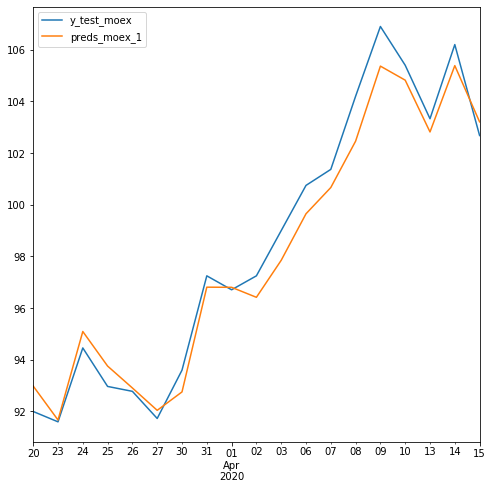

In [965]:
df_1_moex = pd.DataFrame(df_moex_1['Close'])
df_1_moex.columns = ['y_test_moex_1']
df_1_moex['preds_moex_1'] = preds_moex_1
df_1_moex.index = df_moex_1['Close'].index
df_1_moex.plot(figsize=(8,8))

In [970]:
t1 = range(len(df_moex_1)-5)
p1 = range(5,len(df_moex_1))

In [971]:
len(t1)

14

In [973]:
X_train_tt1 = np.array(df_moex_1['Close'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt1 = np.array(df_moex_1['SMA'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt1 = np.array(df_moex_1['Close'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt1 = np.array(df_moex_1['SMA'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt2 = np.array(df_moex_1['Close'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt2 = np.array(df_moex_1['EMA'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt2 = np.array(df_moex_1['Close'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt2 = np.array(df_moex_1['EMA'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt3 = np.array(df_moex_1['mom'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt3 = np.array(df_moex_1['mom'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt3 = np.array(df_moex_1['mom'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt3 = np.array(df_moex_1['mom'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt4 = np.array(df_moex_1[['Close', 'high', 'low']].iloc[t1[:12]])
y_train_tt4 = np.array(df_moex_1['%K'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt4 = np.array(df_moex_1[['Close', 'high', 'low']].iloc[t1[12:]])
y_test_tt4 = np.array(df_moex_1['%K'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt5 = np.array(df_moex_1[['Close', 'high', 'low']].iloc[t1[:12]])
y_train_tt5 = np.array(df_moex_1['%D'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt5 = np.array(df_moex_1[['Close', 'high', 'low']].iloc[t1[12:]])
y_test_tt5 = np.array(df_moex_1['%D'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt6 = np.array(df_moex_1['EMA'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt6 = np.array(df_moex_1['MACD'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt6 = np.array(df_moex_1['EMA'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt6 = np.array(df_moex_1['MACD'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt7 = np.array(df_moex_1['mom'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt7 = np.array(df_moex_1['RSI'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt7 = np.array(df_moex_1['mom'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt7 = np.array(df_moex_1['RSI'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt9 = np.array(df_moex_1['EnBull'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt9 = np.array(df_moex_1['EnBull'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt9 = np.array(df_moex_1['EnBull'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt9 = np.array(df_moex_1['EnBull'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt11 = np.array(df_moex_1['Close'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt11 = np.array(df_moex_1['bb_bbm'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt11 = np.array(df_moex_1['Close'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt11 = np.array(df_moex_1['bb_bbm'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt12 = np.array(df_moex_1['high'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt12 = np.array(df_moex_1['mom'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt12 = np.array(df_moex_1['high'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt12 = np.array(df_moex_1['mom'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt13 = np.array(df_moex_1['low'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt13 = np.array(df_moex_1['bb_bbl'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt13 = np.array(df_moex_1['low'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt13 = np.array(df_moex_1['bb_bbl'].iloc[p1[12:]]).reshape(-1, 1)

X_train_tt14 = np.array(df_moex_1['BearPow'].iloc[t1[:12]]).reshape(-1, 1)
y_train_tt14 = np.array(df_moex_1['BearPow'].iloc[p1[:12]]).reshape(-1, 1)
X_test_tt14 = np.array(df_moex_1['BearPow'].iloc[t1[12:]]).reshape(-1, 1)
y_test_tt14 = np.array(df_moex_1['BearPow'].iloc[p1[12:]]).reshape(-1, 1)

In [974]:
svr_1 = svm.SVR(kernel='rbf', gamma='scale', C=76, epsilon=0.02)
svr_1.fit(X_train_tt1, y_train_tt1)
preds__1 = svr1.predict(X_test_tt1)
print(mse(y_test_tt1, preds__1), rrmse(y_test_tt1, preds__1), mae(y_test_tt1, preds__1), mape(y_test_tt1, preds__1))
svr_2 = svm.SVR(kernel='rbf', gamma='scale', C=86, epsilon=0.02)
svr_2.fit(X_train_tt2, y_train_tt2)
preds__2 = svr2.predict(X_test_tt2)
print(mse(y_test_tt2, preds__2), rrmse(y_test_tt2, preds__2), mae(y_test_tt2, preds__2), mape(y_test_tt2, preds__2))
svr_3 = svm.SVR(kernel='rbf', gamma='scale', C=90, epsilon=0.00097)
svr_3.fit(X_train_tt3, y_train_tt3)
preds__3 = svr3.predict(X_test_tt3)
print(mse(y_test_tt3, preds__3), rrmse(y_test_tt3, preds__3), mae(y_test_tt3, preds__3), mape(y_test_tt3, preds__3))
svr_4 = svm.SVR(kernel='rbf', gamma='scale', C=2000, epsilon=33)
svr_4.fit(X_train_tt4, y_train_tt4)
preds__4 = svr4.predict(X_test_tt4)
print(mse(y_test_tt4, preds__4), rrmse(y_test_tt4, preds__4), mae(y_test_tt4, preds__4), mape(y_test_tt4, preds__1))
svr_5 = svm.SVR(kernel='rbf', gamma='scale', epsilon=100)
svr_5.fit(X_train_tt5, y_train_tt5)
preds__5 = svr5.predict(X_test_tt5)
print(mse(y_test_tt5, preds__5), rrmse(y_test_tt5, preds__5), mae(y_test_tt5, preds__5), mape(y_test_tt5, preds__5))
svr_6 = svm.SVR(kernel='rbf', gamma='scale', C=1, epsilon=10)
svr_6.fit(X_train_tt6, y_train_tt6)
preds__6 = svr6.predict(X_test_tt6)
print(mse(y_test_tt6, preds__6), rrmse(y_test_tt6, preds__6), mae(y_test_tt6, preds__6), mape(y_test_tt6, preds__6))
svr_7 = svm.SVR(kernel='rbf', gamma='scale', C=1934, epsilon=1.1)
svr_7.fit(X_train_tt7, y_train_tt7)
preds__7 = svr7.predict(X_test_tt7)
print(mse(y_test_tt7, preds__7), rrmse(y_test_tt7, preds__7), mae(y_test_tt7, preds__7), mape(y_test_tt7, preds__7))
svr_9 = svm.SVR(kernel='rbf', gamma='scale', C=10, epsilon=0.11)
svr_9.fit(X_train_tt9, y_train_tt9)
preds__9 = svr9.predict(X_test_tt9)
print(mse(y_test_tt9, preds__9), rrmse(y_test_tt9, preds__9), mae(y_test_tt9, preds__9), mape(y_test_tt9, preds__9))
svr_11 = svm.SVR(kernel='rbf', gamma='scale', epsilon=0.003, C=250)
svr_11.fit(X_train_tt11, y_train_tt11)
preds__11 = svr11.predict(X_test_tt11)
print(mse(y_test_tt11, preds__11), rrmse(y_test_tt11, preds__11), mae(y_test_tt11, preds__11), mape(y_test_tt11, preds__11))
svr_12 = svm.SVR(kernel='rbf', gamma='scale', epsilon=0.0003, C=0.9)
svr_12.fit(X_train_tt12, y_train_tt12)
preds__12 = svr12.predict(X_test_tt12)
print(mse(y_test_tt12, preds__12), rrmse(y_test_tt12, preds__12), mae(y_test_tt12, preds__12), mape(y_test_tt12, preds__12))
svr_13 = svm.SVR(kernel='rbf', gamma='scale', epsilon=0.00003, C=62)
svr_13.fit(X_train_tt13, y_train_tt13)
preds__13 = svr13.predict(X_test_tt13)
print(mse(y_test_tt13, preds__13), rrmse(y_test_tt13, preds__13), mae(y_test_tt13, preds__13), mape(y_test_tt13, preds__13))
svr_14 = svm.SVR(kernel='rbf', gamma='scale', epsilon=1, C=1)
svr_14.fit(X_train_tt14, y_train_tt14)
preds__14 = svr14.predict(X_test_tt14)
print(mse(y_test_tt14, preds__14), rrmse(y_test_tt14, preds__14), mae(y_test_tt14, preds__14), mape(y_test_tt14, preds__14))

70.15774424275692 0.08797627701138805 8.277181603595594 8.657604750560816
47.76752898190507 0.07064571004842711 6.7523947956306 6.877151413439135
16.195639270455306 0.509323418441359 3.4450063909593216 43.943467979802364
1337.0516722479115 0.394729740343298 31.020693124294073 22.614141219703022
1352.1557581895581 0.42551839580145645 36.679543515516805 42.393030881522684
8.988256668650745 1.140987116220344 2.9975033681458925 114.08479697123471
47.73265473258575 0.12106336326711285 6.753713549088836 11.722455481226993
7.766632243507697 0.5010443868709972 2.786318993880731 49.99497854820617
38.570882079761084 0.06509971045063773 6.136639819674592 6.30442941296462
59.77628014447144 1.036565552320196 7.587866624420944 101.78526124319865
147.86145585636504 0.14212681260611057 12.03572863603349 14.132444900336344
3.240668365711347 0.9574661870412677 1.3957175811170084 61.407079935837885


C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kunil\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [975]:
X_test_res_moex_1 = [preds__1, preds__2, preds__3, preds__4, preds__5, preds__6, preds__7, preds__9, preds__11, preds__12, preds__13, preds__14]
X_test_res_moex_1 = pd.DataFrame.from_records(X_test_res_moex_1)
X_test_res_moex_1 = X_test_res_moex_1.T

In [976]:
X_test_res_moex_1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [986]:
df_moex_1['Close'].iloc[p1[12:]]

2020-04-14    106.199997
2020-04-15    102.680000
Freq: B, Name: Close, dtype: float64

In [981]:
preds_moex_11 = eclf_moex.predict(X_test_res_moex_1)
mse(df_moex_1['Close'].iloc[p1[12:]], preds_moex_11)

10.927062398979372

In [982]:
math.sqrt(mse(df_moex_1['Close'].iloc[p1[12:]], preds_moex_11))

3.3056107452298997

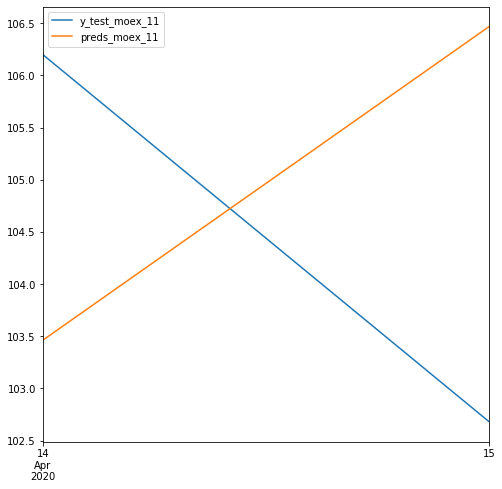

In [989]:
df_1_moex_1 = pd.DataFrame(df_moex_1['Close'].iloc[p1[12:]])
df_1_moex_1.columns = ['y_test_moex_11']
df_1_moex_1['preds_moex_11'] = preds_moex_11
df_1_moex_1.index = df_moex_1['Close'].iloc[p1[12:]].index
df_1_moex_1.plot(figsize=(8,8))